### <span style = 'color:green'> Build a machine learning algorithm to predict the house prices by using ensemble techniques.   </span>

#### About the dataset

Here's a brief version of what you'll find in the data description file.

- SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.
- MSSubClass: The building class
- MSZoning: The general zoning classification
- LotFrontage: Linear feet of street connected to property
- LotArea: Lot size in square feet
- Street: Type of road access
- Alley: Type of alley access
- LotShape: General shape of property
- LandContour: Flatness of the property
- Utilities: Type of utilities available
- LotConfig: Lot configuration
- LandSlope: Slope of property
- Neighborhood: Physical locations within Ames city limits
- Condition1: Proximity to main road or railroad
- Condition2: Proximity to main road or railroad (if a second is present)
- BldgType: Type of dwelling
- HouseStyle: Style of dwelling
- OverallQual: Overall material and finish quality
- OverallCond: Overall condition rating
- YearBuilt: Original construction date
- YearRemodAdd: Remodel date
- RoofStyle: Type of roof
- RoofMatl: Roof material
- Exterior1st: Exterior covering on house
- Exterior2nd: Exterior covering on house (if more than one material)
- MasVnrType: Masonry veneer type
- MasVnrArea: Masonry veneer area in square feet
- ExterQual: Exterior material quality
- ExterCond: Present condition of the material on the exterior
- Foundation: Type of foundation
- BsmtQual: Height of the basement
- BsmtCond: General condition of the basement
- BsmtExposure: Walkout or garden level basement walls
- BsmtFinType1: Quality of basement finished area
- BsmtFinSF1: Type 1 finished square feet
- BsmtFinType2: Quality of second finished area (if present)
- BsmtFinSF2: Type 2 finished square feet
- BsmtUnfSF: Unfinished square feet of basement area
- TotalBsmtSF: Total square feet of basement area
- Heating: Type of heating
- HeatingQC: Heating quality and condition
- CentralAir: Central air conditioning
- Electrical: Electrical system
- 1stFlrSF: First Floor square feet
- 2ndFlrSF: Second floor square feet
- LowQualFinSF: Low quality finished square feet (all floors)
- GrLivArea: Above grade (ground) living area square feet
- BsmtFullBath: Basement full bathrooms
- BsmtHalfBath: Basement half bathrooms
- FullBath: Full bathrooms above grade
- HalfBath: Half baths above grade
- Bedroom: Number of bedrooms above basement level
- Kitchen: Number of kitchens
- KitchenQual: Kitchen quality
- TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
- Functional: Home functionality rating
- Fireplaces: Number of fireplaces
- FireplaceQu: Fireplace quality
- GarageType: Garage location
- GarageYrBlt: Year garage was built
- GarageFinish: Interior finish of the garage
- GarageCars: Size of garage in car capacity
- GarageArea: Size of garage in square feet
- GarageQual: Garage quality
- GarageCond: Garage condition
- PavedDrive: Paved driveway
- WoodDeckSF: Wood deck area in square feet
- OpenPorchSF: Open porch area in square feet
- EnclosedPorch: Enclosed porch area in square feet
- 3SsnPorch: Three season porch area in square feet
- ScreenPorch: Screen porch area in square feet
- PoolArea: Pool area in square feet
- PoolQC: Pool quality
- Fence: Fence quality
- MiscFeature: Miscellaneous feature not covered in other categories
- MiscVal: $Value of miscellaneous feature
- MoSold: Month Sold
- YrSold: Year Sold
- SaleType: Type of sale
- SaleCondition: Condition of sale


- **File descriptions**
- train.csv - the training set
- test.csv - the test set
- data_description.txt - full description of each column, originally prepared by Dean De Cock but lightly edited to match the column names used here

**Ensemble Techniques**

- Bagging - Building multiple models (typically of the same type) from different subsamples of the training dataset.
- Boosting - Building multiple models (typically of the same type) each of which learns to fix the prediction errors of a prior model in the chain.
- Voting - Building multiple models (typically of differing types) and simple statistics (like calculating the mean) are used to combine predictions.




* Build Various ***ML Models*** with the view of ***increasing accuracy*** of the Model. 


1. Dicision trees regression

2. random forest regression 

3. ADA boost

4. Gradient Boosting with XGBoost




### To download the dataset <a href = 'https://drive.google.com/file/d/1rknDE31orIy3R214mzd4Wcrlbyw7LS2O/view?usp=sharing' title = 'Google Drive'> Click Here

In [58]:
#Analysis and Visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats



#Pre-processing
from sklearn.model_selection import train_test_split
from sklearn.impute import KNNImputer
from sklearn.preprocessing import RobustScaler



#Models 
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor


#Accuracy Metrics
from sklearn.metrics import mean_squared_error

import warnings
warnings.filterwarnings('ignore')

In [59]:
#Importing the dataset
train_df=pd.read_csv('train.csv')
test_df=pd.read_csv('test.csv')

In [60]:
pd.set_option('display.max_columns', None)
train_df.head(5)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

In [61]:
test_df.head(5)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  1461          20       RH         80.0    11622   Pave   NaN      Reg   
1  1462          20       RL         81.0    14267   Pave   NaN      IR1   
2  1463          60       RL         74.0    13830   Pave   NaN      IR1   
3  1464          60       RL         78.0     9978   Pave   NaN      IR1   
4  1465         120       RL         43.0     5005   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl        NAmes      Feedr   
1         Lvl    AllPub    Corner       Gtl        NAmes       Norm   
2         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
3         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
4         HLS    AllPub    Inside       Gtl      StoneBr       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     1Story            5            6       1961   
1       Norm     1Fam     1Story            6            6       1958   
2       Norm     1Fam     2Story            5            5       1997   
3       Norm     1Fam     2Story            6            6       1998   
4       Norm   TwnhsE     1Story            8            5       1992   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          1961     Gable  CompShg     VinylSd     VinylSd       None   
1          1958       Hip  CompShg     Wd Sdng     Wd Sdng    BrkFace   
2          1998     Gable  CompShg     VinylSd     VinylSd       None   
3          1998     Gable  CompShg     VinylSd     VinylSd    BrkFace   
4          1992     Gable  CompShg     HdBoard     HdBoard       None   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0         0.0        TA        TA     CBlock       TA       TA           No   
1       108.0        TA        TA     CBlock       TA       TA           No   
2         0.0        TA        TA      PConc       Gd       TA           No   
3        20.0        TA        TA      PConc       TA       TA           No   
4         0.0        Gd        TA      PConc       Gd       TA           No   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          Rec       468.0          LwQ       144.0      270.0        882.0   
1          ALQ       923.0          Unf         0.0      406.0       1329.0   
2          GLQ       791.0          Unf         0.0      137.0        928.0   
3          GLQ       602.0          Unf         0.0      324.0        926.0   
4          ALQ       263.0          Unf         0.0     1017.0       1280.0   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        TA          Y      SBrkr       896         0             0   
1    GasA        TA          Y      SBrkr      1329         0             0   
2    GasA        Gd          Y      SBrkr       928       701             0   
3    GasA        Ex          Y      SBrkr       926       678             0   
4    GasA        Ex          Y      SBrkr      1280         0             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0        896           0.0           0.0         1         0             2   
1       1329           0.0           0.0         1         1             3   
2       1629           0.0           0.0         2         1             3   
3       1604           0.0           0.0         2         1             3   
4       1280           0.0           0.0         2         0             2   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          TA             5        Typ           0         NaN   
1             1          Gd             6        Typ           0         NaN   
2             1          TA             6        Typ           1          TA   
3             1          Gd  

In [62]:
print(train_df.shape)
print(test_df.shape)

(1460, 81)
(1459, 80)


In [63]:
train_df.duplicated().sum()

0

In [64]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [65]:
#Null Value Columns
train_df.columns[train_df.isnull().sum() > 0]

Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')

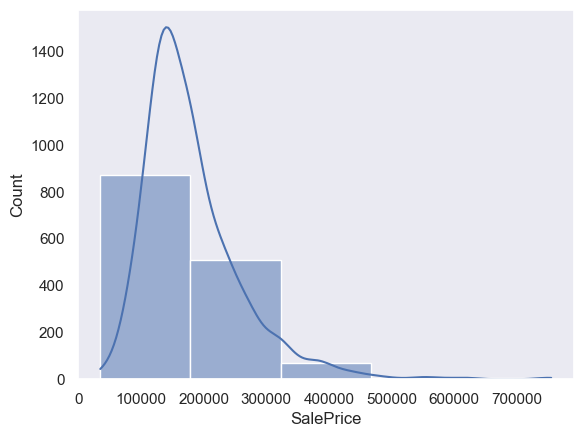

In [66]:
#Distribution of Target Feature
sns.histplot(train_df['SalePrice'], bins=5, kde=True);

**First Look on the Dataset**
- There are total 38 Numerical Features and 43 Non-numerical Features , and 1460 datapoints.
- No Duplicate records found.
- Many Features Contains Null Values.
- **Sale Price** ,which we have to predict contains very high prices , causing skewness.
- Since there are so many features ,let's seperate them into 2 popular categories of Numerical and Categorical and start EDA.

## 1. Exploratory Data Analysis :

In [67]:
#Creating a copy of original dataframe
df=train_df.copy()

In [68]:
# Assuming 'df' is your DataFrame

# Selecting numerical columns
df_num = df.select_dtypes(include='number')

# Selecting categorical columns
df_cat = df.select_dtypes(exclude='number')


In [69]:
print(df_num.shape)
print(df_cat.shape)

(1460, 38)
(1460, 43)


### 1.1 Univariate Analysis

#### 1.1.1 Numerical Features Analysis 

In [70]:
df_num

Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  \
0        1          60         65.0     8450            7            5   
1        2          20         80.0     9600            6            8   
2        3          60         68.0    11250            7            5   
3        4          70         60.0     9550            7            5   
4        5          60         84.0    14260            8            5   
...    ...         ...          ...      ...          ...          ...   
1455  1456          60         62.0     7917            6            5   
1456  1457          20         85.0    13175            6            6   
1457  1458          70         66.0     9042            7            9   
1458  1459          20         68.0     9717            5            6   
1459  1460          20         75.0     9937            5            6   

      YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  \
0          2003          2003       196.0         706           0        150   
1          1976          1976         0.0         978           0        284   
2          2001          2002       162.0         486           0        434   
3          1915          1970         0.0         216           0        540   
4          2000          2000       350.0         655           0        490   
...         ...           ...         ...         ...         ...        ...   
1455       1999          2000         0.0           0           0        953   
1456       1978          1988       119.0         790         163        589   
1457       1941          2006         0.0         275           0        877   
1458       1950          1996         0.0          49        1029          0   
1459       1965          1965         0.0         830         290        136   

      TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  \
0             856       856       854             0       1710             1   
1            1262      1262         0             0       1262             0   
2             920       920       866             0       1786             1   
3             756       961       756             0       1717             1   
4            1145      1145      1053             0       2198             1   
...           ...       ...       ...           ...        ...           ...   
1455          953       953       694             0       1647             0   
1456         1542      2073         0             0       2073             1   
1457         1152      1188      1152             0       2340             0   
1458         1078      1078         0             0       1078             1   
1459         1256      1256         0             0       1256             1   

      BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
0                0         2         1             3             1   
1                1         2         0             3             1   
2                0         2         1             3             1   
3                0         1         0             3             1   
4                0         2         1             4             1   
...            ...       ...       ...           ...           ...   
1455             0         2         1             3             1   
1456             0         2         0             3             1   
1457             0         2         0             4             1   
1458             0         1         0             2             1   
1459             0         1         1             3             1   

      TotRmsAbvGrd  Fireplaces  GarageYrBlt  GarageCars  GarageArea  \
0                8           0       2003.0           2         548   
1                6           1       1976.0           2         460   
2                6           1       2001.0           2         608   
3                7           1       1998.0           3         642   
4

In [71]:
#stats of numerical variables
df_num.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726   
std       1.112799    30.202904     20.645407   181.066207   456.098091   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000   

        BsmtFinSF2    BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  \
count  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean     46.549315   567.240411  1057.429452  1162.626712   346.992466   
std     161.319273   441.866955   438.705324   386.587738   436.528436   
min       0.000000     0.000000     0.000000   334.000000     0.000000   
25%       0.000000   223.000000   795.750000   882.000000     0.000000   
50%       0.000000   477.500000   991.500000  1087.000000     0.000000   
75%       0.000000   808.000000  1298.250000  1391.250000   728.000000   
max    1474.000000  2336.000000  6110.000000  4692.000000  2065.000000   

       LowQualFinSF    GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath  \
count   1460.000000  1460.000000   1460.000000   1460.000000  1460.000000   
mean       5.844521  1515.463699      0.425342      0.057534     1.565068   
std       48.623081   525.480383      0.518911      0.238753     0.550916   
min        0.000000   334.000000      0.000000      0.000000     0.000000   
25%        0.000000  1129.500000      0.000000      0.000000     1.000000   
50%        0.000000  1464.000000      0.000000      0.000000     2.000000   
75%        0.000000  1776.750000      1.000000      0.000000     2.000000   
max      572.000000  5642.000000      3.000000      2.000000     3.000000   

          HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces  \
count  1460.000000   1460.000000   1460.000000   1460.000000  1460.000000   
mean      0.382877      2.866438      1.046575      6.517808     0.613014   
std       0.502885      0.815778      0.220338      1.625393     0.644666   
min       0.000000      0.000000      0.000000      2.000000     0.000000   
25%       0.000000      2.000000      1.000000      5.000000     0.000000   
50%       0.000000      3.000000      1.000000      6.000000     1.000000   
75%       1.000000      3.000000      1.000000      7.000000     1.000000   
max       2.000000      8.000000      3.000000     14.000000     3.000000   

       GarageYrBlt   GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  \
count  1379.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean   1978.506164     1.767123   472.980137    94.244521    46.660274   
std      24.689725     0.747315   213.804841   125.338794    66.256028   
min    1900.000000     0.000000     0.000000     0.000000     0.000000   
25%    1961.000000     1.000000   334.500000     0.000000     0.000000   
50%    1980.000000     2.000000   480.000000     0.000000    25.000000   
75%    2002.000000     2.000000   576.000000   168.000000    68.000000   
max    2

In [72]:
#Since there are so many features, we'll drop some of them using Correlation
# Dropping columns with Pearson's correlation below +/- 0.2

pearson_corr=df_num.corrwith(df['SalePrice'])
low_corr_pearson = pearson_corr[pearson_corr.abs() <= 0.2].index
df_num.drop(low_corr_pearson, axis=1, inplace=True)

In [73]:
df_num.shape

(1460, 23)

- After dropping the less correlated feature with respect to *SalePrice* ,we are now left with *23* features.
- Some of the features such as *OverallQual*,*OverallCond* etc. are taking discrete values, let's check if they are categorical features taking numerical values or they are really numerical features.	

In [74]:
num_cat=[]
for i in df_num.columns:
    if len(df_num[i].unique())<=15:
        num_cat.append(i)
print(num_cat)        

['OverallQual', 'BsmtFullBath', 'FullBath', 'HalfBath', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars']


- Yes these are categorical values , so for now let's drop them from Numerical Dataframe and Append to Categorical Dataframe.

In [75]:
df_num.drop(num_cat, axis=1, inplace=True) #Dropping from Numerical Dataframe
df_cat=pd.concat([df_cat, df[num_cat]], axis=1) #Adding to Categorical Dataframe

- **Now let's start analysing the variables. .**
- **To analyse numerical variables Histogram and boxplot are 2 important graphs ,which tell us about distributions ,outliers.**
- **Another important factor while univariate analysis is presence of null values**.


In [76]:
#Saving the columns in list for easy referencing 
num=df_num.columns

In [77]:
def plot_column(dataframe, column_name):
    missing_mask = dataframe[column_name].isnull()
    missing_count = missing_mask.sum()
    present_count = len(dataframe) - missing_count
    
    sns.set_theme(style='dark')

    fig, axes = plt.subplots(1, 3, figsize=(15, 4))
    
    # Plot histogram
    sns.histplot(data=dataframe, x=column_name, ax=axes[0], kde=True, bins=5, color='skyblue', edgecolor='black')
    axes[0].set_title(f'Histogram of {column_name.upper()}')
    axes[0].set_xlabel(f'{column_name.capitalize()}')
    
    # Plot boxplot
    sns.boxplot(data=dataframe, x=column_name, ax=axes[1], palette='Set3', showmeans=True) 
    axes[1].set_title(f'Boxplot of {column_name.upper()}')
    axes[1].set_xlabel(f'{column_name.capitalize()}')
    
    # Plot barplot for missing values
    sns.barplot(x=['Present', 'Missing'], y=[present_count, missing_count], palette='coolwarm', ax=axes[2])
    axes[2].set_title(f'Missing Values in {column_name.upper()}')
    
    plt.tight_layout()
    plt.show()

# Usage:
# plot_column(your_dataframe, 'your_column_name')


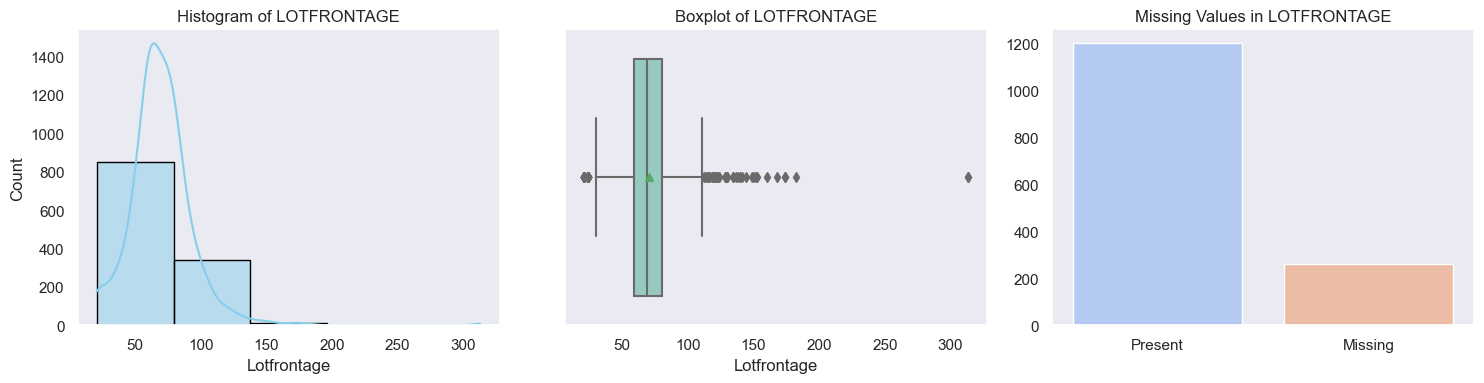

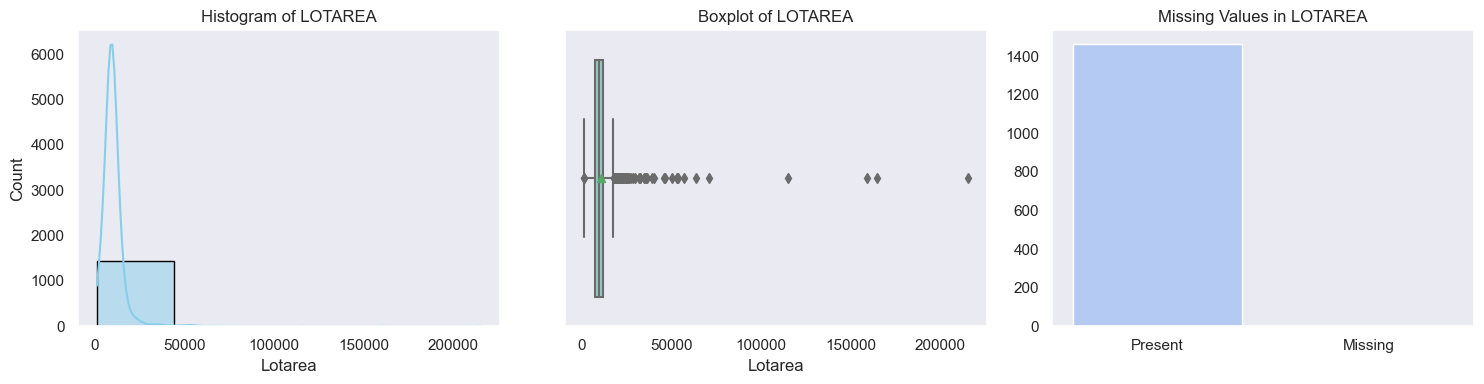

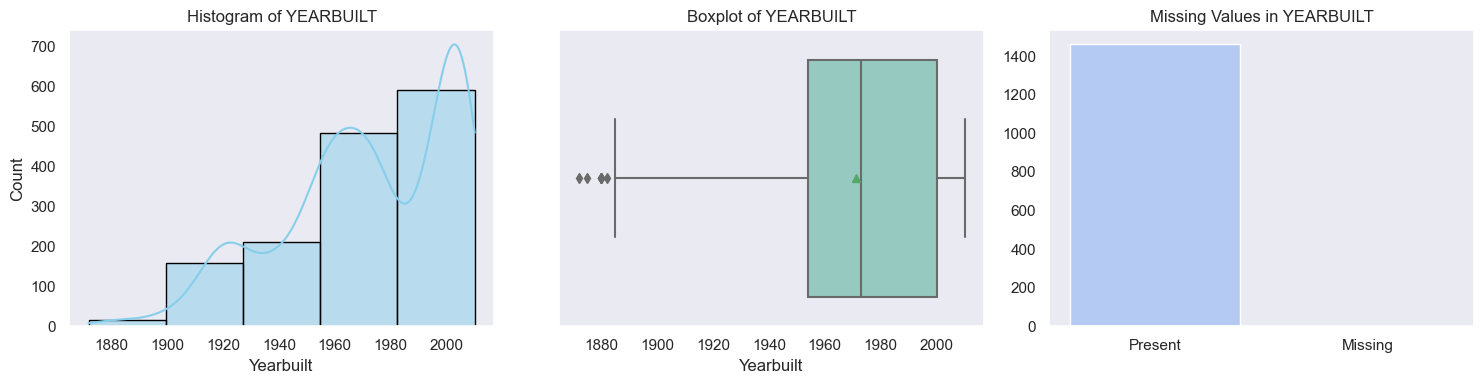

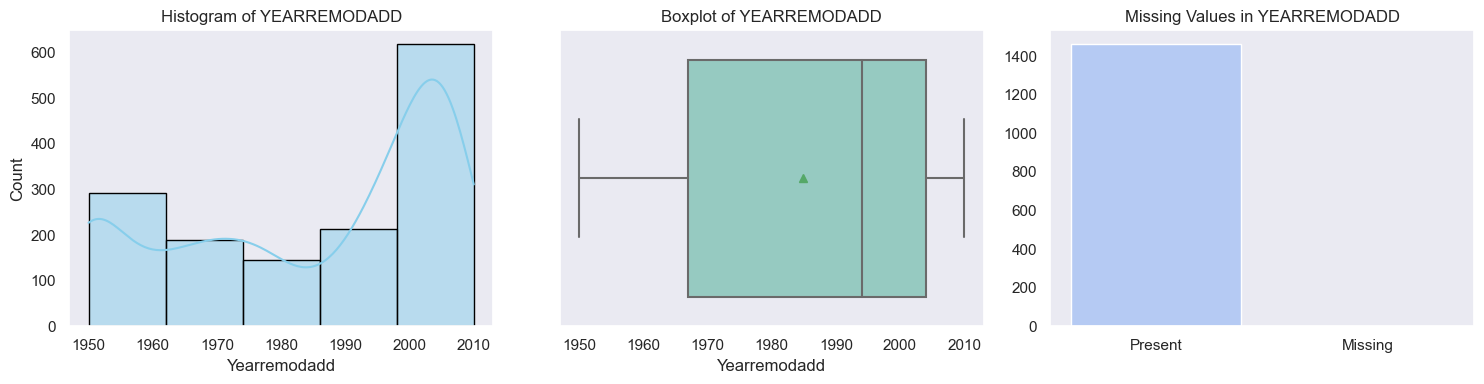

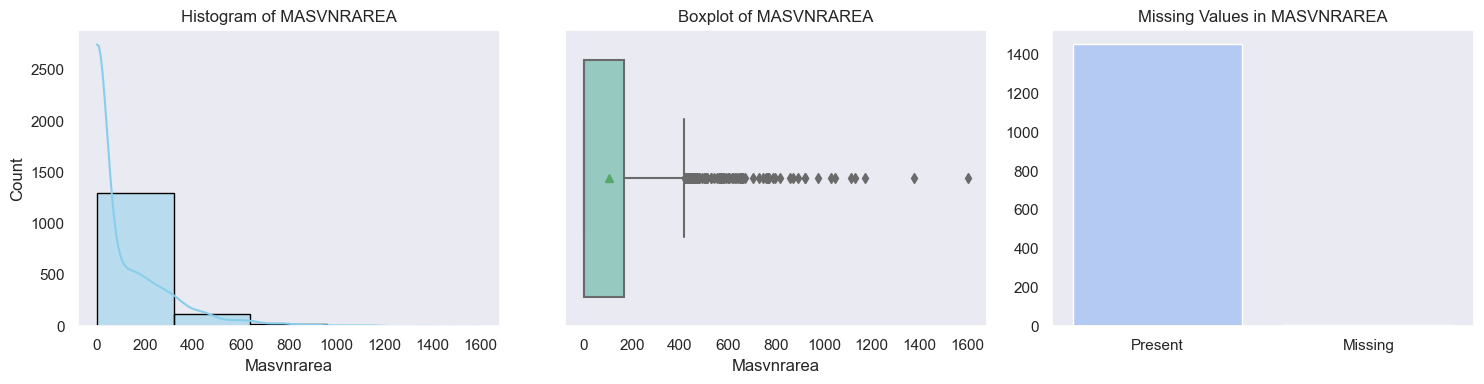

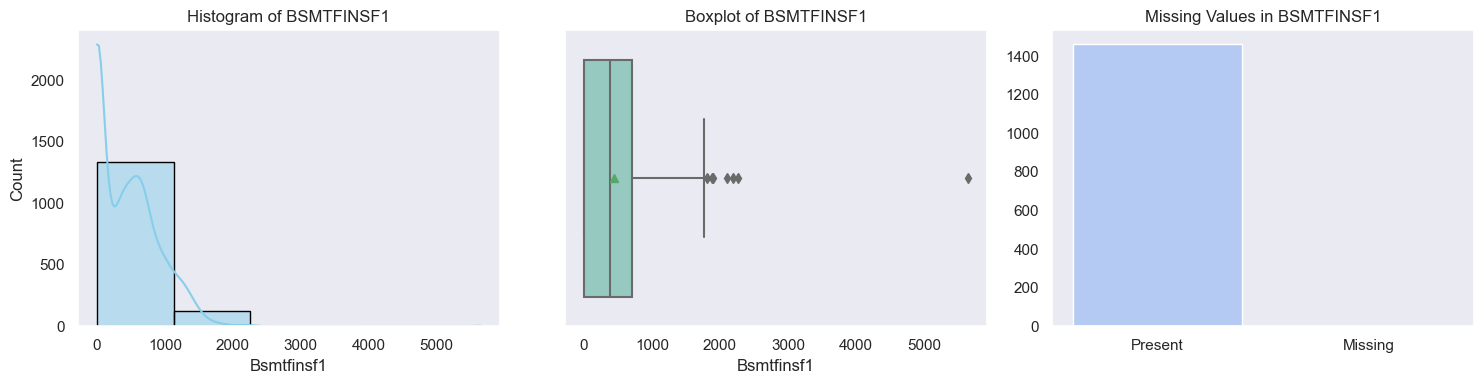

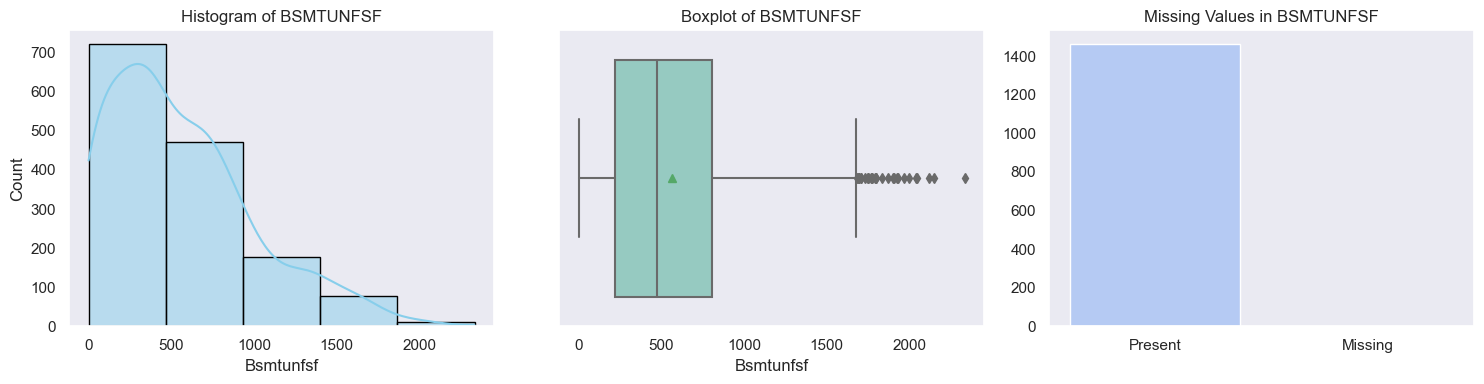

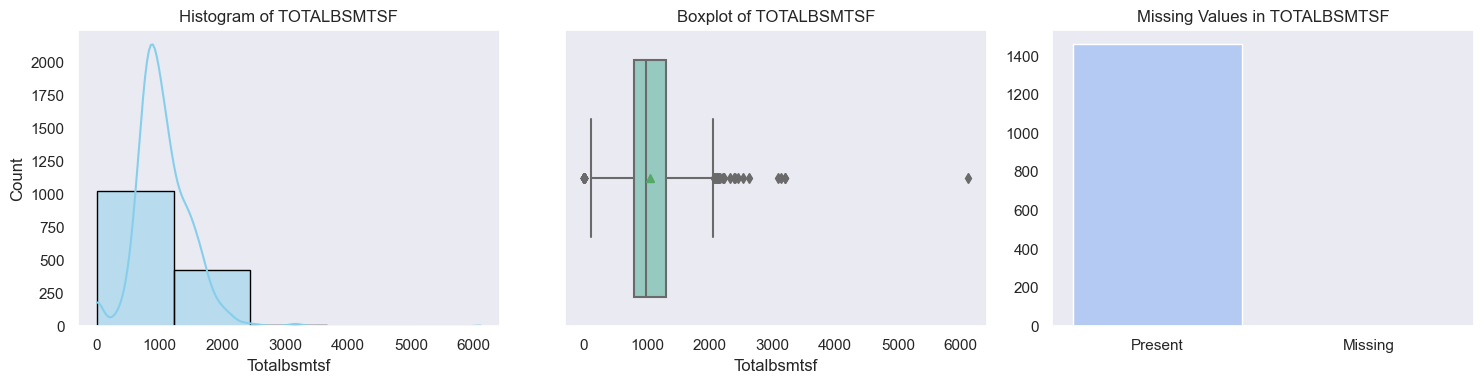

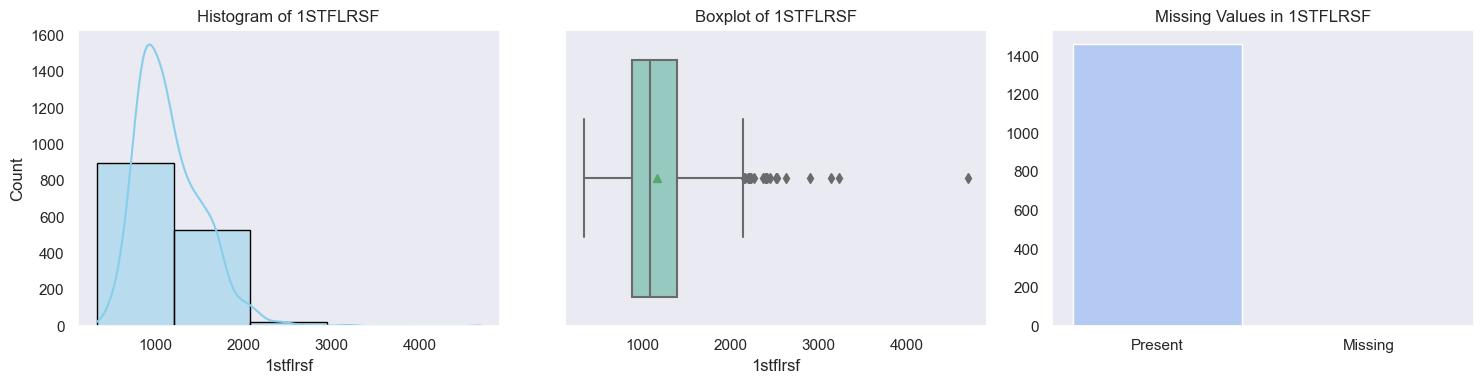

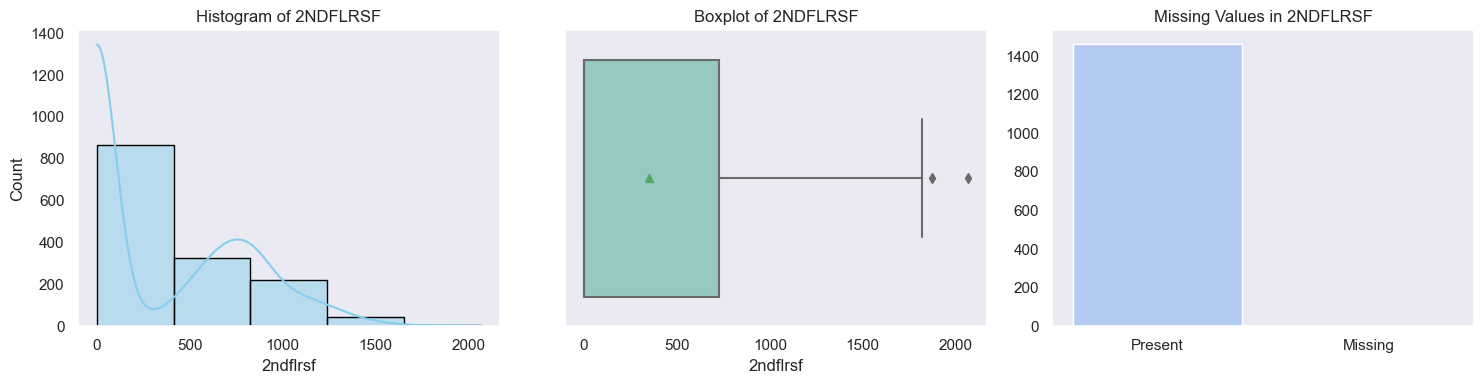

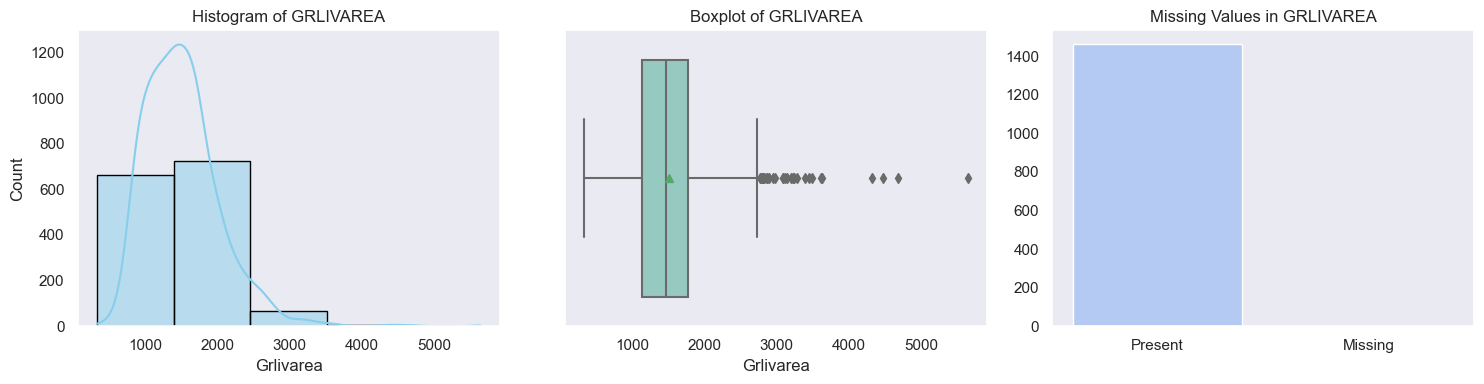

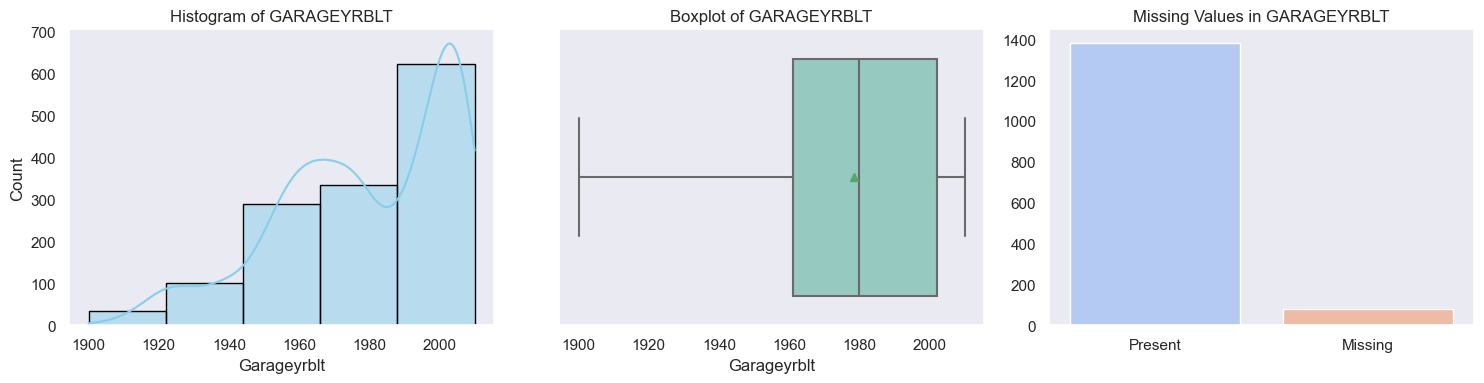

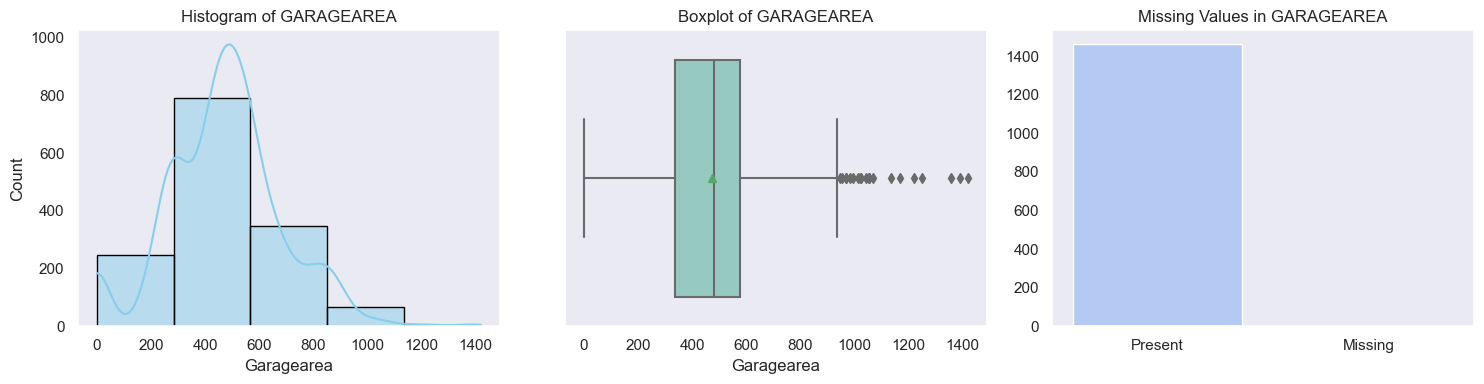

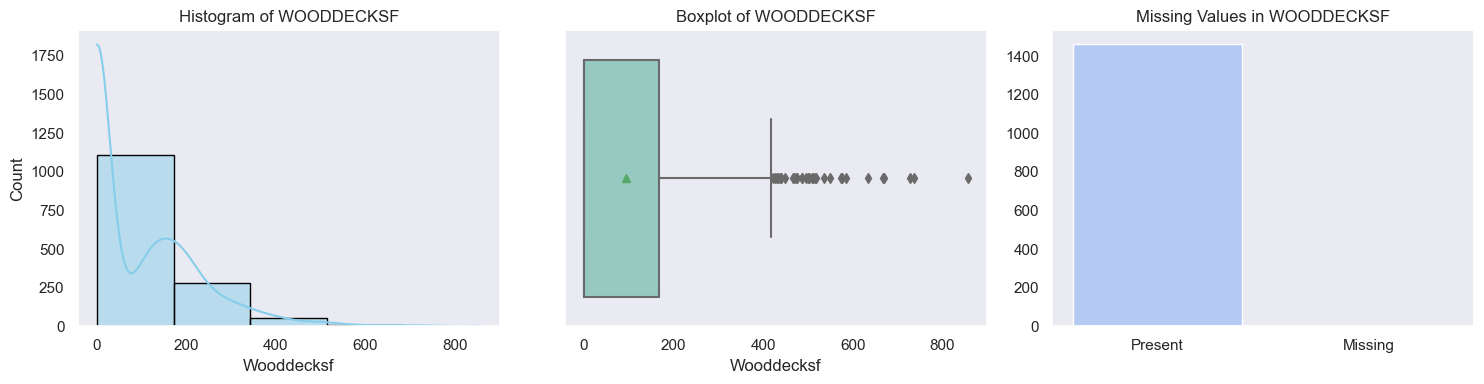

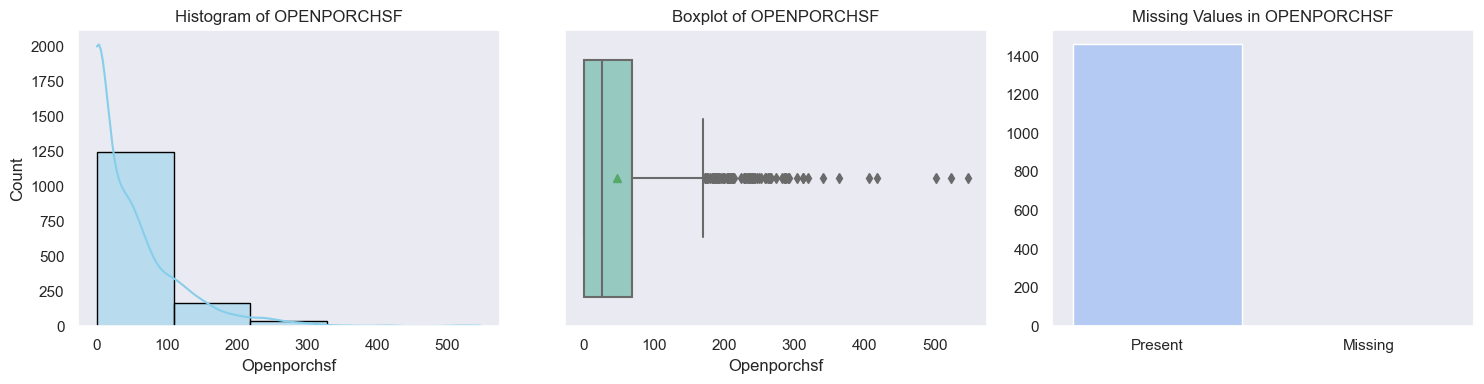

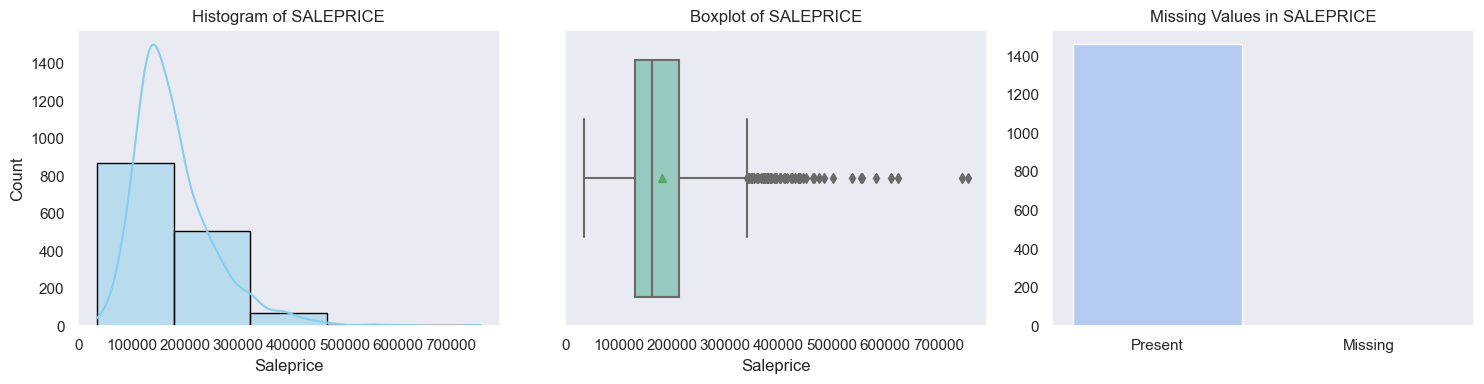

In [78]:
for i in df_num.columns:
    plot_column(df_num,i)

**Observations**
- Since there are so many columns ,let's summarise the features on the basis of 3 things , 
    1. distibution ,
    2. outlier and 
    3. Presence of missing values.
- **Distibution :**
    - All the numerical features are showing right skewed disribution with variability,some are less skewed ,some are more, with some exceptions such as 'Garageyrblt', 'yearremodadd'
    - Going forward ,depending on the need we'll see if we should Normalise them or not .
- **Outliers :**
    - *Features With Outliers* : As expected every features need outlier treatment except ,*'Garageyrblt', 'yearremodadd'*.
    - We'll check for justifications of outliers during Bi-Variate Analysis ,whether they are erroneous outliers or true outliers.
- **Missing Values :**
    - *Features with Missing Values* : 'LotFrontage' ,'GarageYrBlt'
- Some Features contain so many 0's , *MasVnrArea* , *2ndFlrSF*,*WoodDeckSF*, let's check them individually to see what are these.

In [79]:
print(df_num['MasVnrArea'].value_counts())
print(df_cat['MasVnrType'].value_counts())

0.0      861
180.0      8
72.0       8
108.0      8
120.0      7
        ... 
562.0      1
89.0       1
921.0      1
762.0      1
119.0      1
Name: MasVnrArea, Length: 327, dtype: int64
None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64


- So basically , if there is no Masonry veneer , 2nd Floor and Wooddeck in the property ,they are set to 0.
- But some inconsistency, no. of 0's in *MasVrArea* should be equal to *MasVnrType* and they are not, so let's see them.

In [80]:
df1=df[(df['MasVnrType']=='None') | (df['MasVnrArea']==0)]
df2=df[(df['MasVnrType']=='None') & (df['MasVnrArea']==0)]

In [81]:
combined_df = pd.concat([df1, df2])
# Drop duplicates to keep only rows that are unique across both DataFrames
different_rows = combined_df.drop_duplicates(keep=False)

different_rows

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
624    625          60       RL         80.0    10400   Pave   NaN      Reg   
688    689          20       RL         60.0     8089   Pave   NaN      Reg   
773    774          20       RL         70.0    10150   Pave   NaN      Reg   
1230  1231          90       RL          NaN    18890   Pave   NaN      IR1   
1241  1242          20       RL         83.0     9849   Pave   NaN      Reg   
1300  1301          60       RL          NaN    10762   Pave   NaN      IR1   
1334  1335         160       RM         24.0     2368   Pave   NaN      Reg   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
624          Lvl    AllPub    Inside       Gtl       NWAmes       Norm   
688          HLS    AllPub    Inside       Gtl      StoneBr       Norm   
773          Lvl    AllPub    Inside       Gtl        NAmes      Feedr   
1230         Lvl    AllPub    Inside       Gtl       Sawyer      Feedr   
1241         Lvl    AllPub    Inside       Gtl      Somerst       Norm   
1300         Lvl    AllPub   CulDSac       Gtl      Gilbert       Norm   
1334         Lvl    AllPub    Inside       Gtl       BrDale       Norm   

     Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
624        Norm     1Fam     2Story            6            5       1972   
688        Norm     1Fam     1Story            8            6       2007   
773        Norm     1Fam     1Story            5            5       1958   
1230       RRAe   Duplex     1.5Fin            5            5       1977   
1241       Norm     1Fam     1Story            7            6       2007   
1300       Norm     1Fam     2Story            7            5       1999   
1334       Norm   TwnhsE     2Story            5            6       1970   

      YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
624           1972     Gable  CompShg     VinylSd     VinylSd       None   
688           2007     Gable  CompShg     MetalSd     MetalSd    BrkFace   
773           1958     Gable  CompShg     Wd Sdng     Wd Sdng       None   
1230          1977      Shed  CompShg     Plywood     Plywood       None   
1241          2007       Hip  CompShg     VinylSd     VinylSd      Stone   
1300          1999     Gable  CompShg     VinylSd     VinylSd       None   
1334          1970     Gable  CompShg     HdBoard     HdBoard       None   

      MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
624        288.0        TA        TA     CBlock       TA       TA   
688          0.0        Gd        TA      PConc       Gd       TA   
773          1.0        TA        TA     CBlock       TA       TA   
1230         1.0        TA        TA     CBlock       Gd       TA   
1241         0.0        Gd        TA      PConc       Gd       TA   
1300       344.0        Gd        TA      PConc       Gd       TA   
1334       312.0        TA        TA     CBlock       TA       TA   

     BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  \
624            No          Rec         247          Unf           0   
688            Av          GLQ         945          Unf           0   
773            No          Rec         456          Unf           0   
1230           No          GLQ         498          Rec         211   
1241           Av          Unf           0          Unf           0   
1300           No          GLQ         694          Unf           0   
1334           No          LwQ         765          Unf           0   

      BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir Electrical  \
624         485          732    GasA        Gd          Y      SBrkr   
688         474         1419    GasA        Ex          Y      SBrkr   
773         456          912    GasA        Ex          Y      FuseA   
1230        652         1361    GasA        Ex          Y      SBrkr   
1241       1689         1689    GasA        Ex          Y      SBrkr   
1300      

- Some data inconsistency is there,if we notice both columns , 1st Row has no Masonry veneer but area is given ,same for 3rd,4th row, similarly some other inconsistencies ,we'll fix them during pre processing.

#### 1.1.1 Categorical Features Analysis

In [82]:
df_cat

MSZoning Street Alley LotShape LandContour Utilities LotConfig LandSlope  \
0          RL   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
1          RL   Pave   NaN      Reg         Lvl    AllPub       FR2       Gtl   
2          RL   Pave   NaN      IR1         Lvl    AllPub    Inside       Gtl   
3          RL   Pave   NaN      IR1         Lvl    AllPub    Corner       Gtl   
4          RL   Pave   NaN      IR1         Lvl    AllPub       FR2       Gtl   
...       ...    ...   ...      ...         ...       ...       ...       ...   
1455       RL   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
1456       RL   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
1457       RL   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
1458       RL   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
1459       RL   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   

     Neighborhood Condition1 Condition2 BldgType HouseStyle RoofStyle  \
0         CollgCr       Norm       Norm     1Fam     2Story     Gable   
1         Veenker      Feedr       Norm     1Fam     1Story     Gable   
2         CollgCr       Norm       Norm     1Fam     2Story     Gable   
3         Crawfor       Norm       Norm     1Fam     2Story     Gable   
4         NoRidge       Norm       Norm     1Fam     2Story     Gable   
...           ...        ...        ...      ...        ...       ...   
1455      Gilbert       Norm       Norm     1Fam     2Story     Gable   
1456       NWAmes       Norm       Norm     1Fam     1Story     Gable   
1457      Crawfor       Norm       Norm     1Fam     2Story     Gable   
1458        NAmes       Norm       Norm     1Fam     1Story       Hip   
1459      Edwards       Norm       Norm     1Fam     1Story     Gable   

     RoofMatl Exterior1st Exterior2nd MasVnrType ExterQual ExterCond  \
0     CompShg     VinylSd     VinylSd    BrkFace        Gd        TA   
1     CompShg     MetalSd     MetalSd       None        TA        TA   
2     CompShg     VinylSd     VinylSd    BrkFace        Gd        TA   
3     CompShg     Wd Sdng     Wd Shng       None        TA        TA   
4     CompShg     VinylSd     VinylSd    BrkFace        Gd        TA   
...       ...         ...         ...        ...       ...       ...   
1455  CompShg     VinylSd     VinylSd       None        TA        TA   
1456  CompShg     Plywood     Plywood      Stone        TA        TA   
1457  CompShg     CemntBd     CmentBd       None        Ex        Gd   
1458  CompShg     MetalSd     MetalSd       None        TA        TA   
1459  CompShg     HdBoard     HdBoard       None        Gd        TA   

     Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1 BsmtFinType2  \
0         PConc       Gd       TA           No          GLQ          Unf   
1        CBlock       Gd       TA           Gd          ALQ          Unf   
2         PConc       Gd       TA           Mn          GLQ          Unf   
3        BrkTil       TA       Gd           No          ALQ          Unf   
4         PConc       Gd       TA           Av          GLQ          Unf   
...         ...      ...      ...          ...          ...          ...   
1455      PConc       Gd       TA           No          Unf          Unf   
1456     CBlock       Gd       TA           No          ALQ          Rec   
1457      Stone       TA       Gd           No          GLQ          Unf   
1458     CBlock       TA       TA           Mn          GLQ          Rec   
1459     CBlock       TA       TA           No          BLQ          LwQ   

     Heating HeatingQC CentralAir Electrical KitchenQual Functional  \
0       GasA        Ex          Y      SBrkr          Gd        Typ   
1       GasA        Ex          Y      SBrkr          TA        Typ   
2       GasA        Ex          Y      SBrkr          Gd        Typ   
3       GasA        Gd          Y      SBrkr          Gd        Typ   
4       GasA        Ex

- Now here we have 50 features , and since these are categorical features Pearson Correlation Coefficient is not useful ,though we can use Spearman Correlation Coefficient for Ordinal Categorical Features, for reducing the features.
- Also some features, on just taking a glance ,showing majority of single values such as *MSZoning*,*Street*,*LandContour* etc. ,so we can drop them also as they don't provide any variability or doesn't create any difference to the SalePrice if we keep them or not .

In [83]:
#checking the counts of features to find imabalnced features
for i in df.columns:
    if len(df[i].unique())<=3:
        print(i)
        print(df[i].value_counts())

Street
Pave    1454
Grvl       6
Name: Street, dtype: int64
Alley
Grvl    50
Pave    41
Name: Alley, dtype: int64
Utilities
AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64
LandSlope
Gtl    1382
Mod      65
Sev      13
Name: LandSlope, dtype: int64
CentralAir
Y    1365
N      95
Name: CentralAir, dtype: int64
BsmtHalfBath
0    1378
1      80
2       2
Name: BsmtHalfBath, dtype: int64
HalfBath
0    913
1    535
2     12
Name: HalfBath, dtype: int64
PavedDrive
Y    1340
N      90
P      30
Name: PavedDrive, dtype: int64


- Clearly we can drop ,*Street* and *Utilities* as they are kind of constant features. 
- We'll drop *Alley* ,as majorirty of it's values are null.
- We can drop some other features also ,but slightly doubtful so we'll visit them again after some more digging.

In [84]:
df_cat=df_cat.drop(['Street','Utilities','Alley'],axis=1)
df_cat.shape

(1460, 47)

In [85]:
#Defining a function to plot pieplot and countplot
def plot_cat_column(dataframe,column_name):
    missing_mask = dataframe[column_name].isnull()
    missing_count = missing_mask.sum()
    present_count = len(dataframe) - missing_count
    sns.set_theme(style='dark')

    fig, axes = plt.subplots(1, 3, figsize=(10, 4))
    counts = dataframe[column_name].value_counts()
    axes[0].pie(counts, labels=counts.index, autopct='%1.1f%%', 
                colors=sns.color_palette('Set1'), startangle=90,shadow=True)
    
    sns.countplot(data=df, x=column_name, ax=axes[1],palette='Set1')
    
    axes[0].set_title(f'Pie-Chart of {column_name.upper()}')
    axes[1].set_title(f'CountPlot of  {column_name.upper()}')
    
    axes[0].set_xlabel(f'{column_name.capitalize()}')
    axes[1].set_xlabel(f'{column_name.capitalize()}')
    axes[1].tick_params(axis='x', rotation=45) 
    # Plot barplot for missing values
    sns.barplot(x=['Present', 'Missing'], y=[present_count, missing_count], palette='coolwarm', ax=axes[2])
    axes[2].set_title(f'Missing Values in {column_name.upper()}')
    
   
    plt.suptitle(f'Plots of {column_name}', fontsize=16)
    plt.tight_layout()
    plt.show()

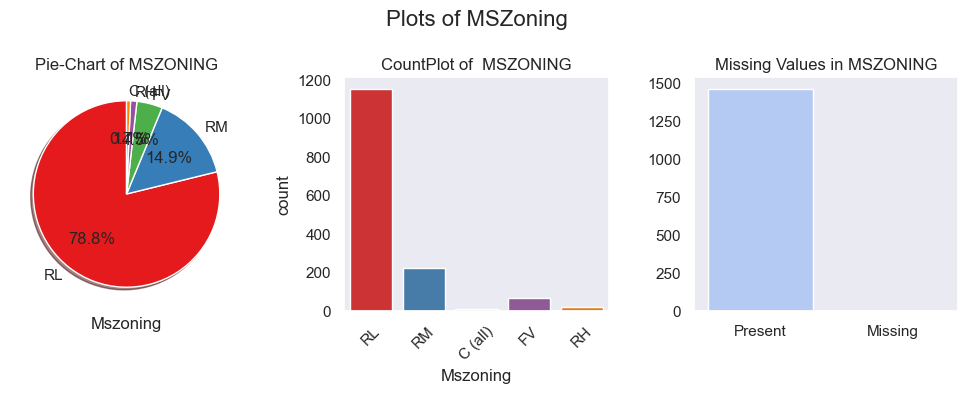

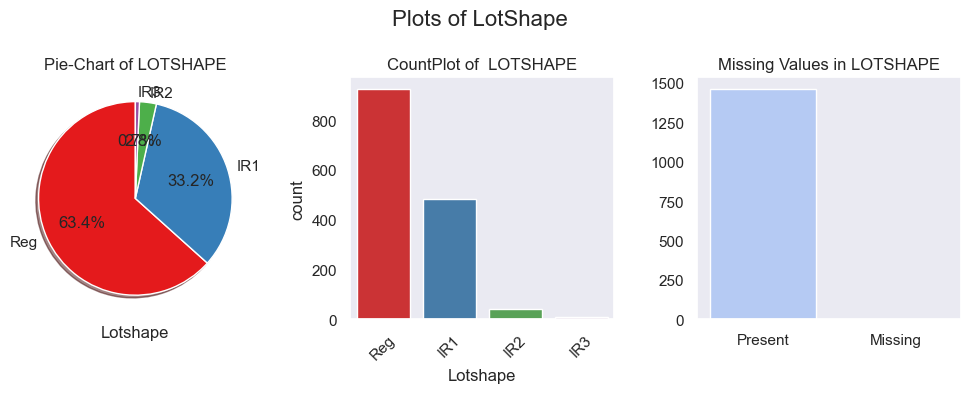

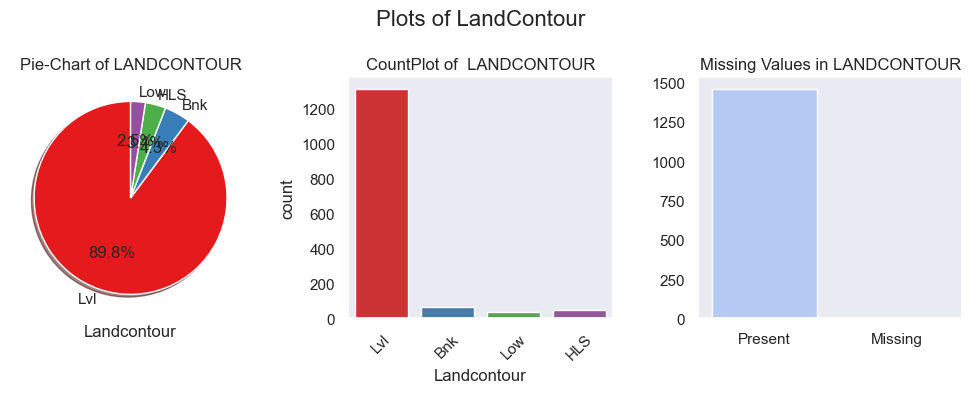

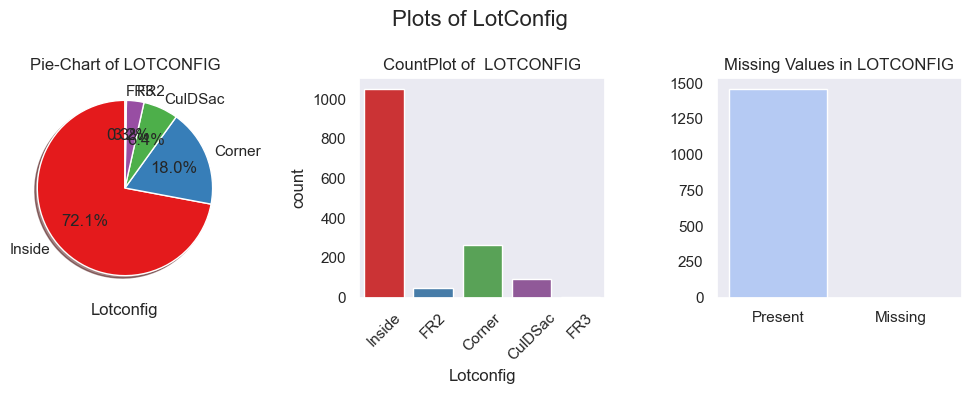

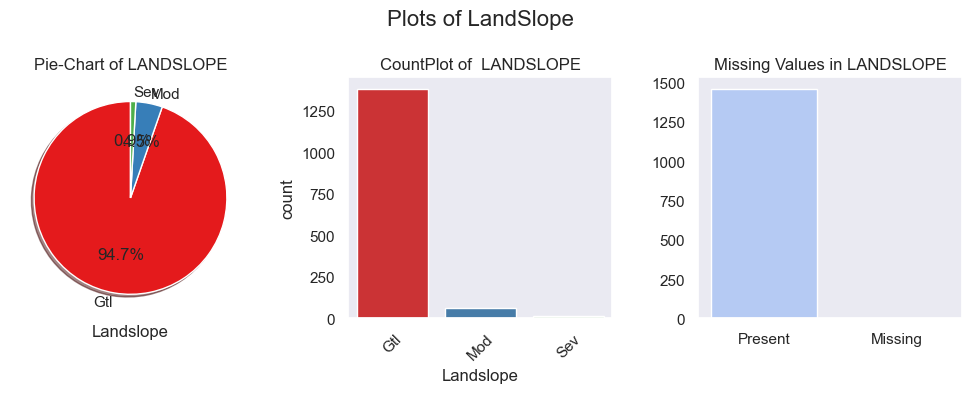

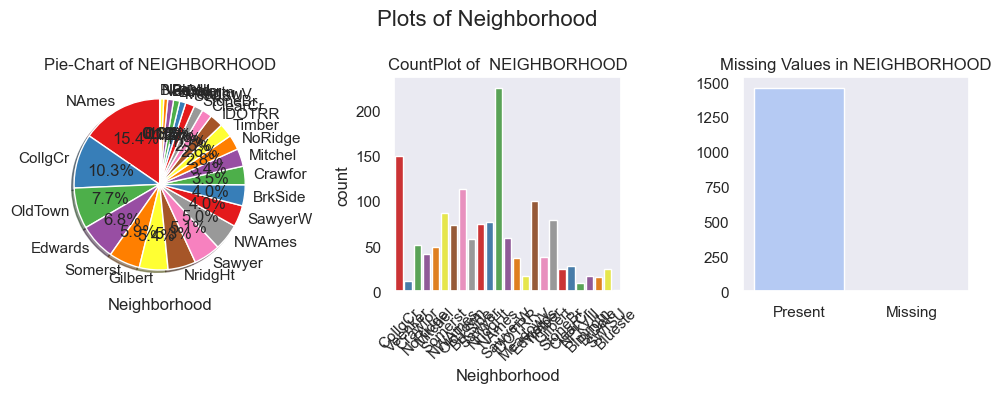

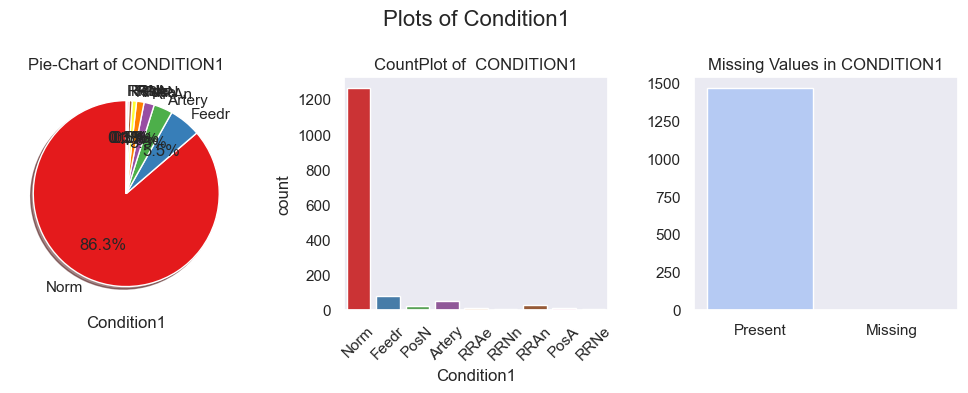

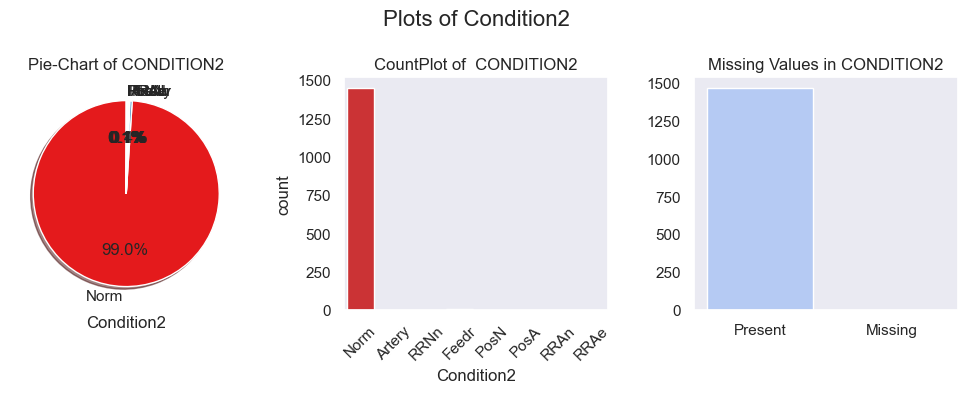

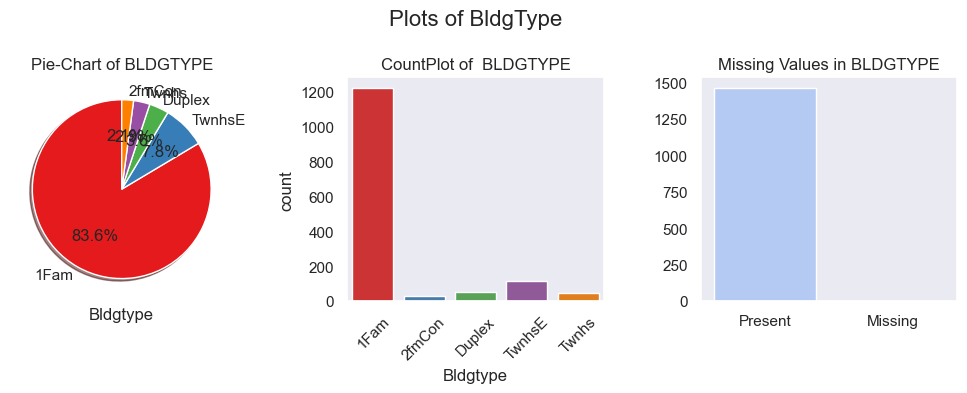

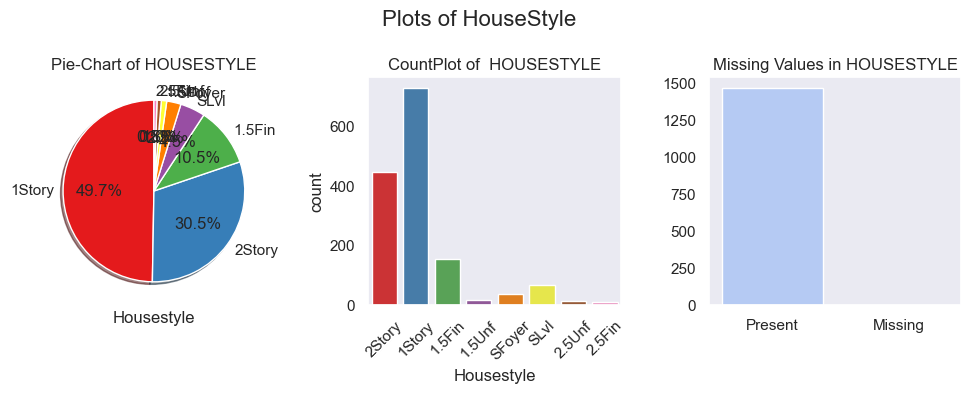

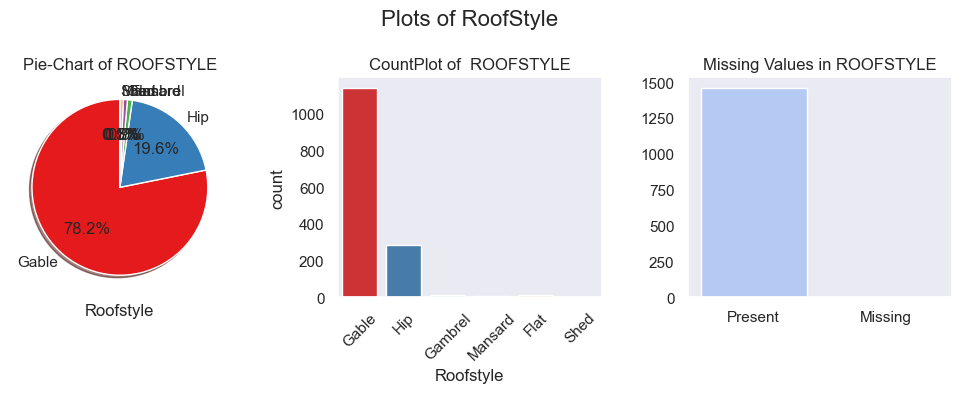

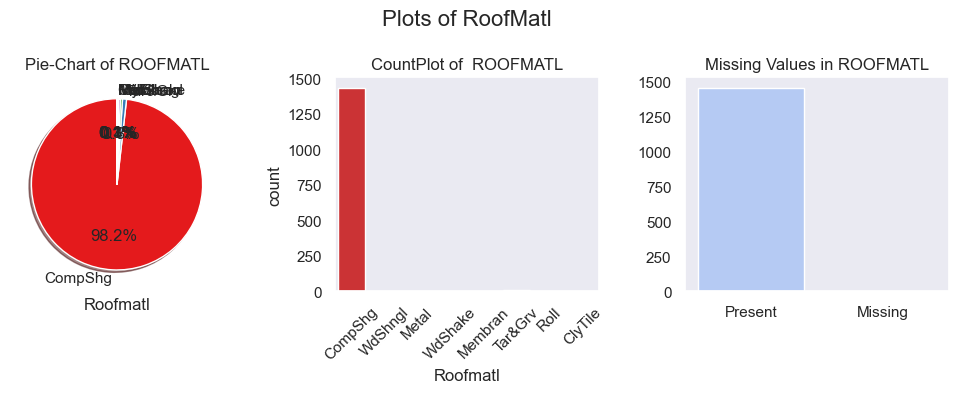

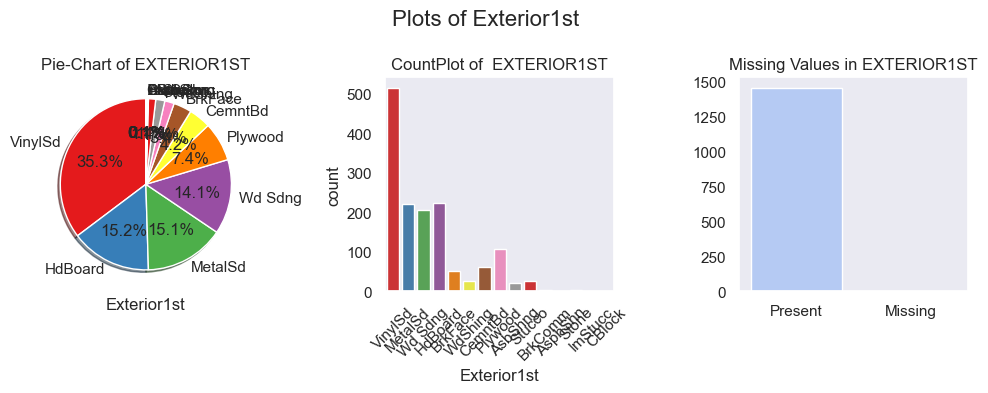

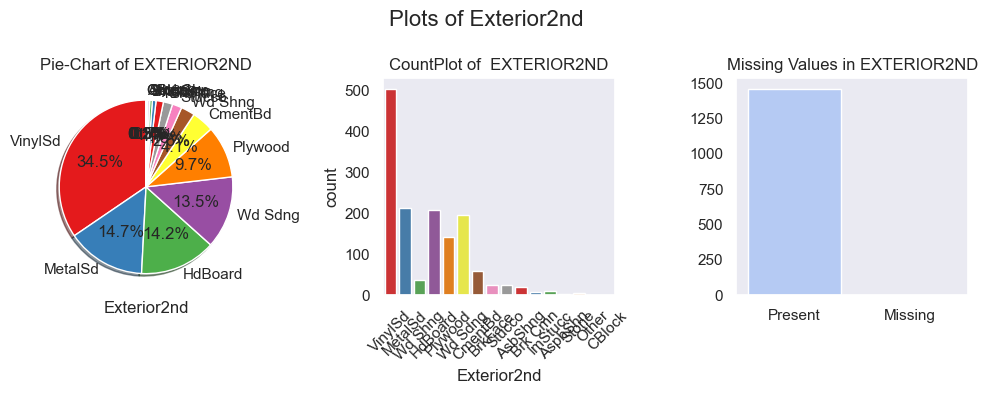

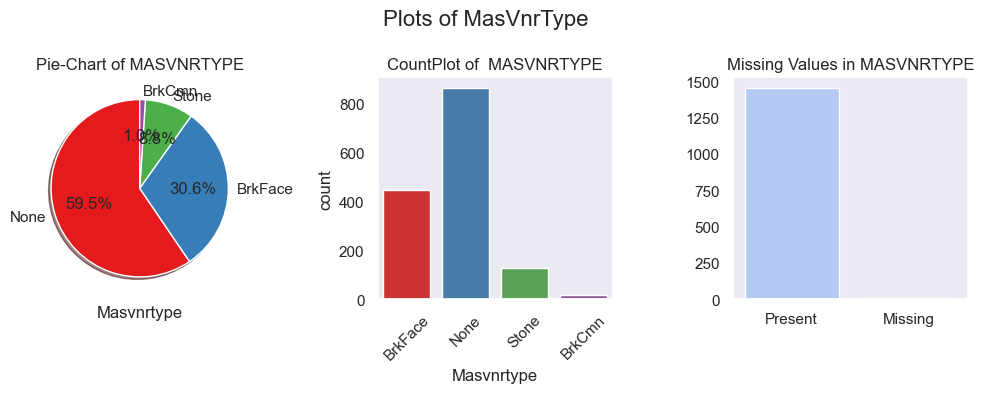

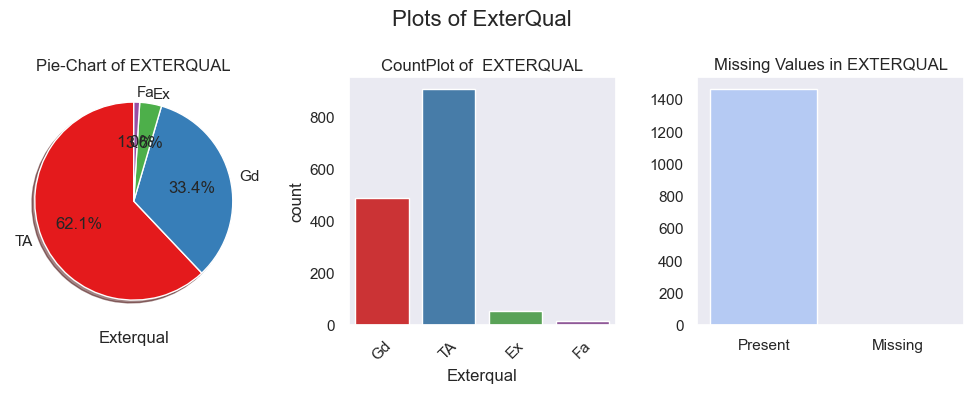

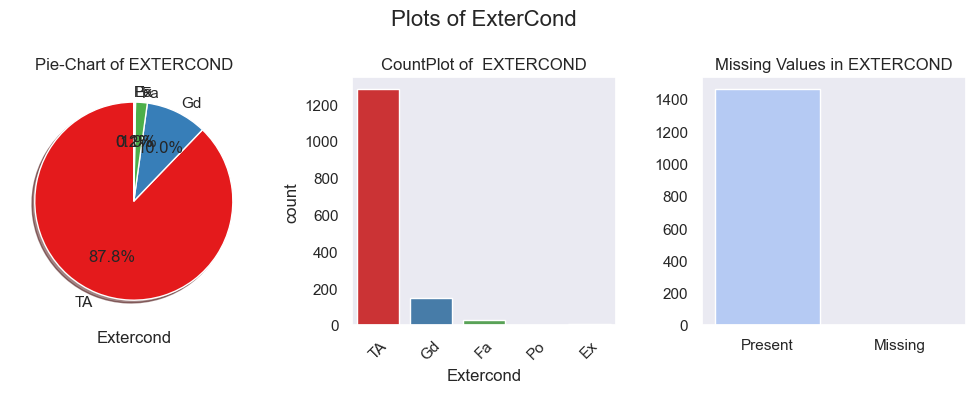

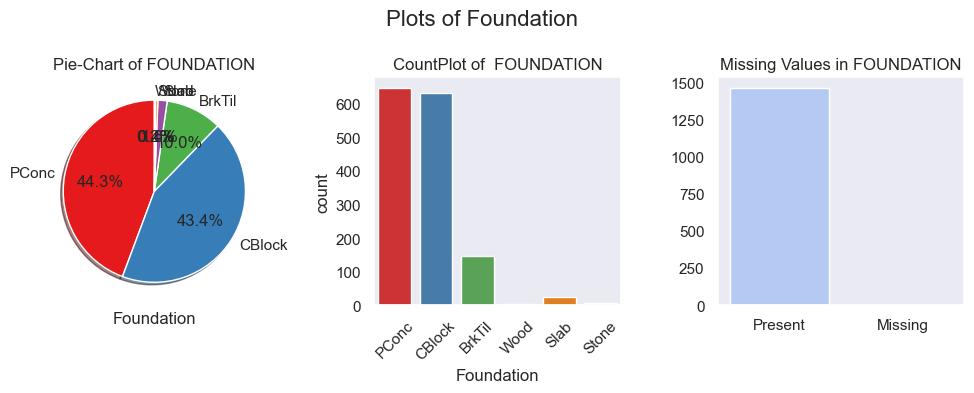

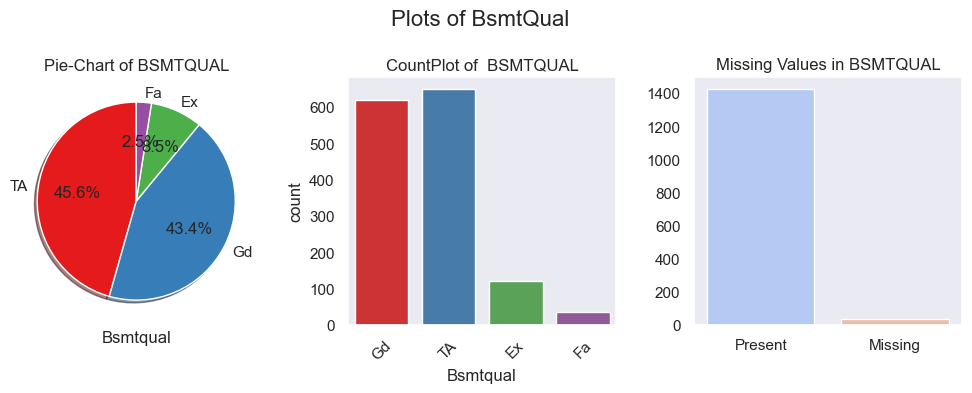

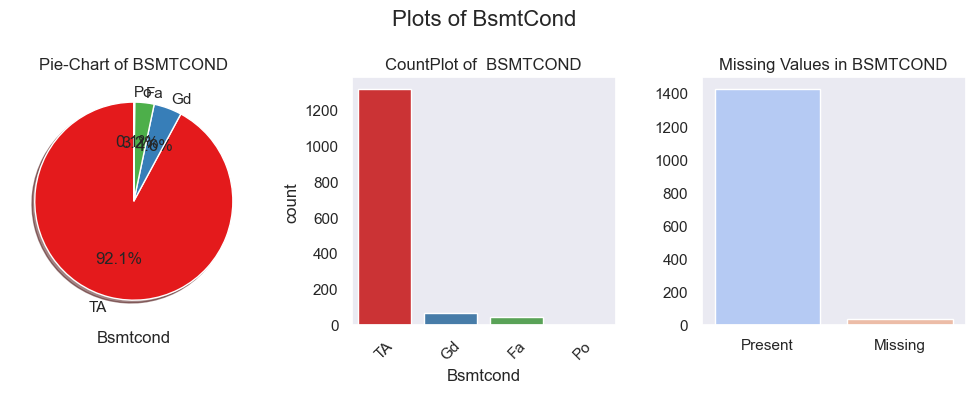

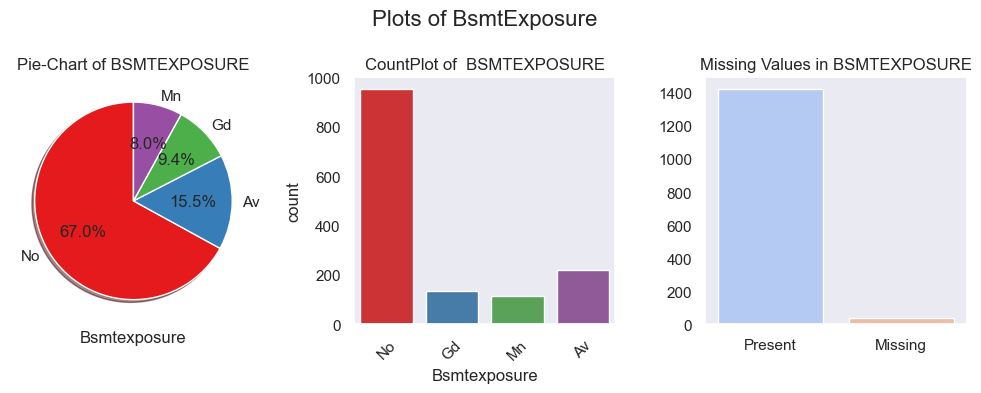

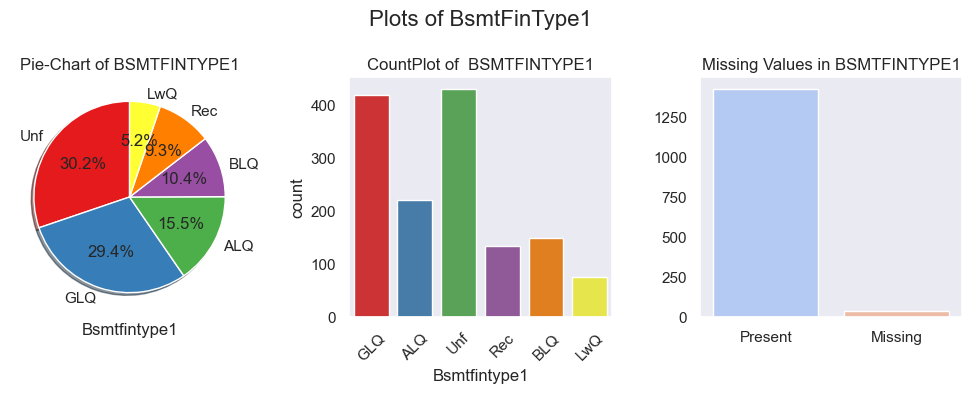

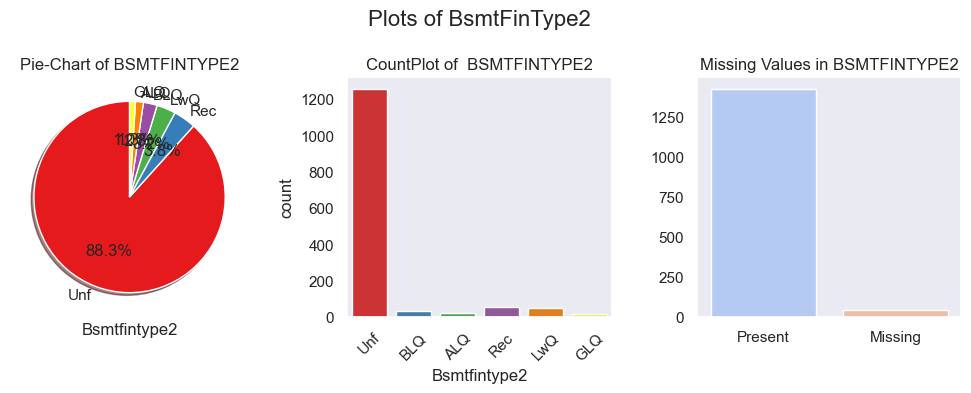

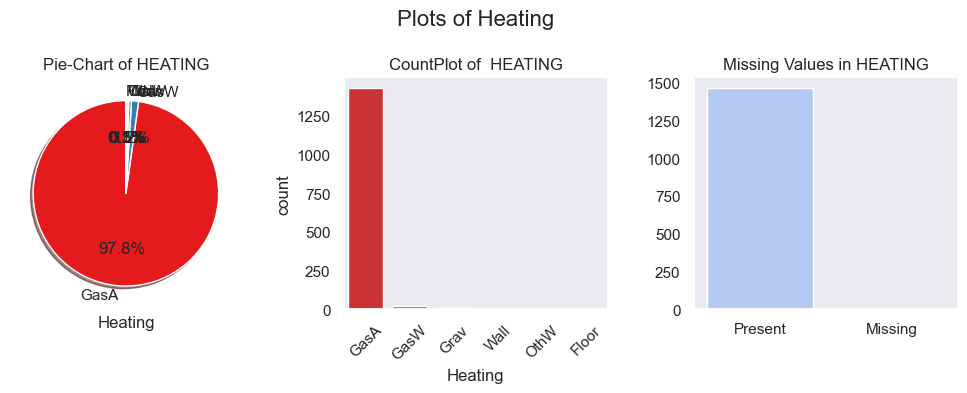

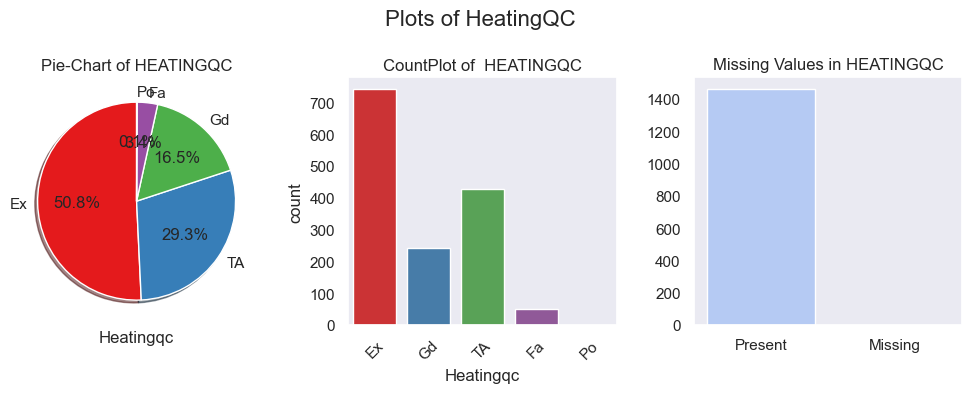

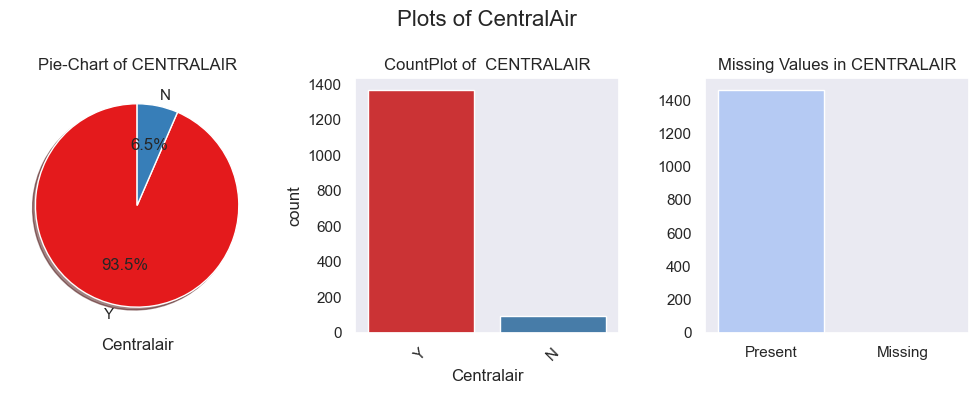

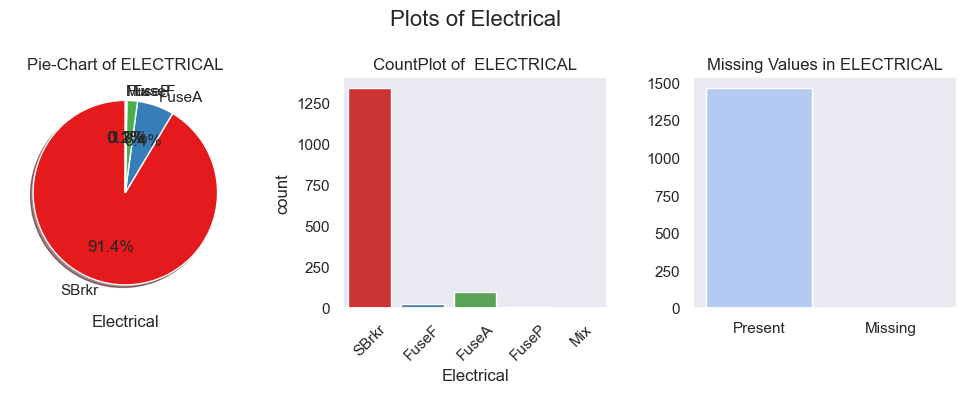

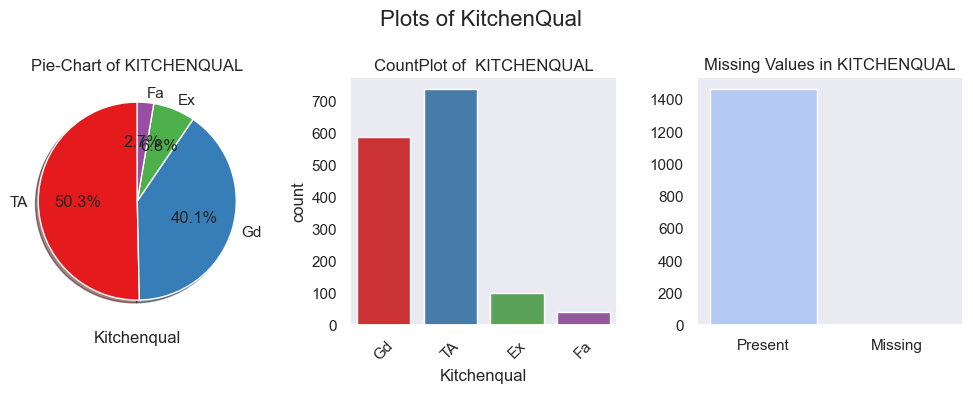

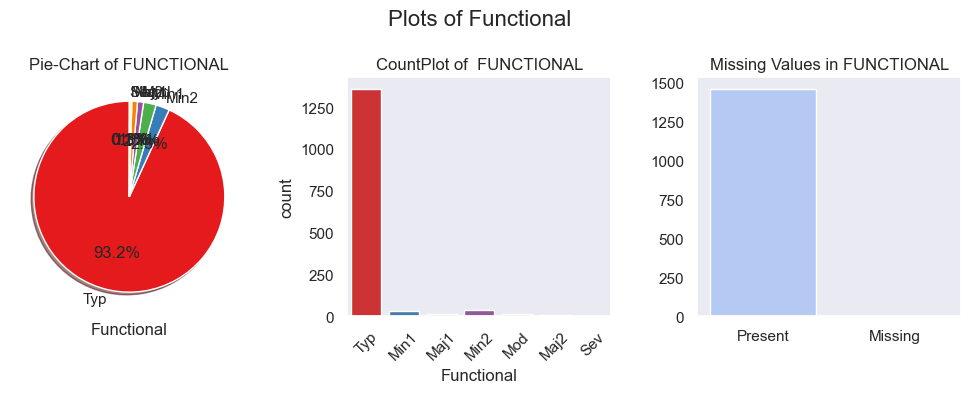

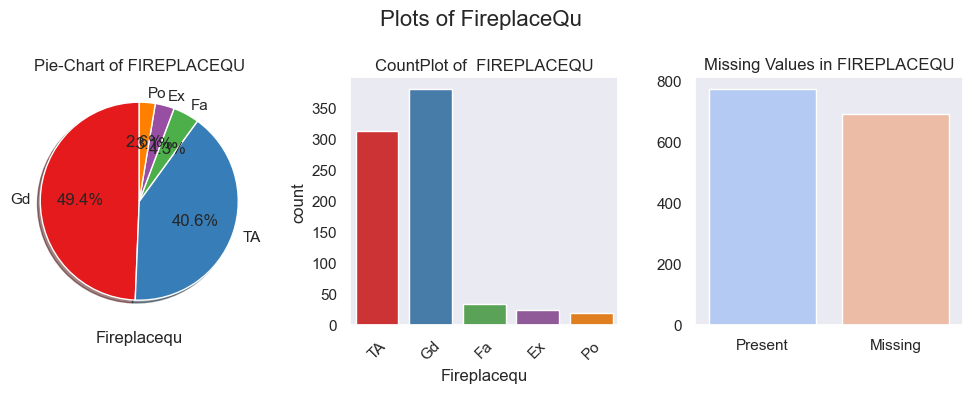

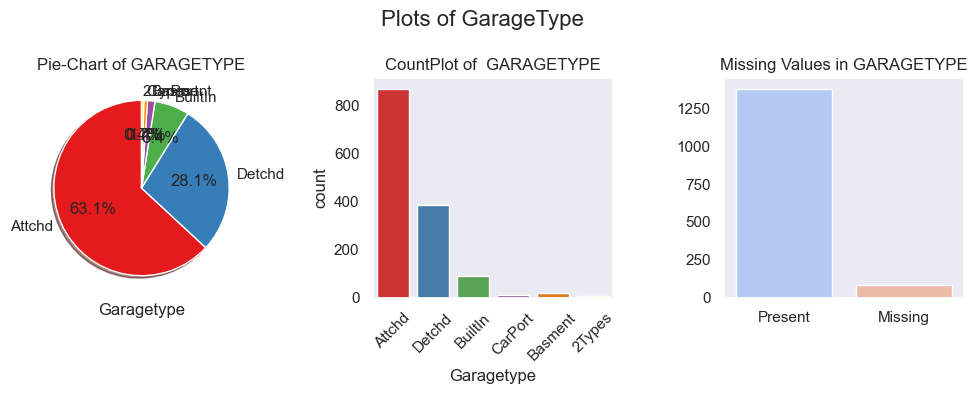

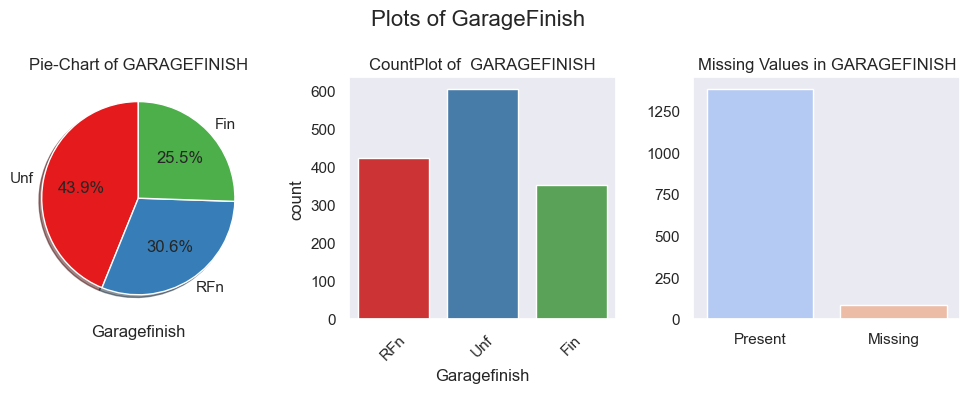

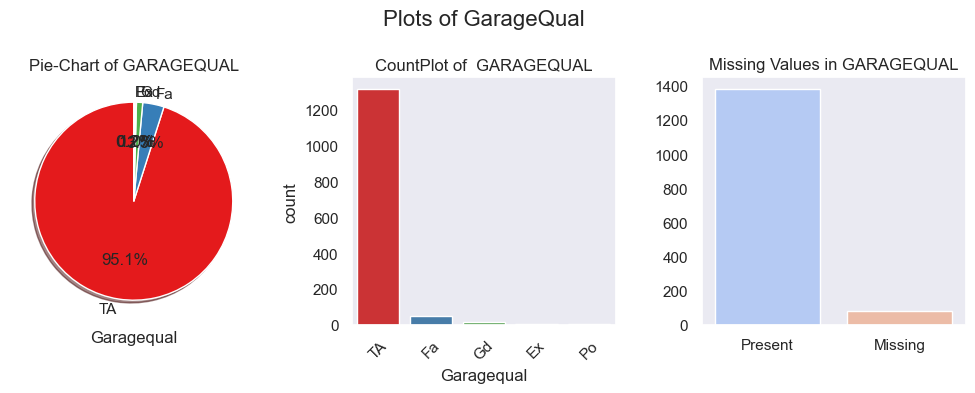

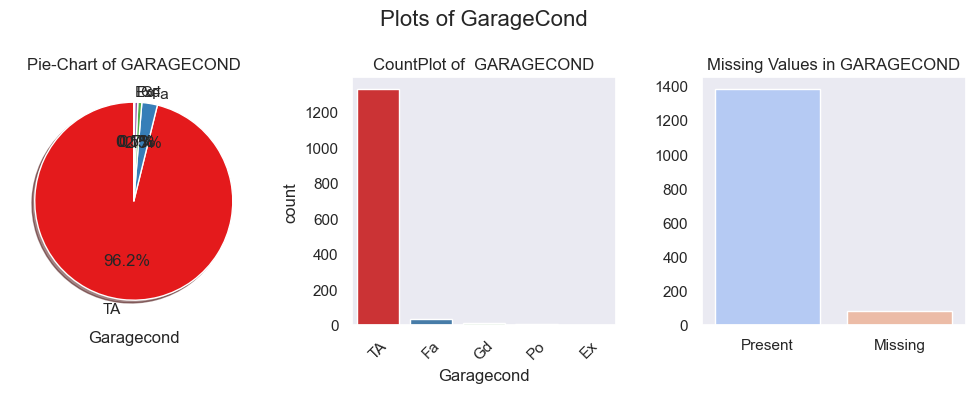

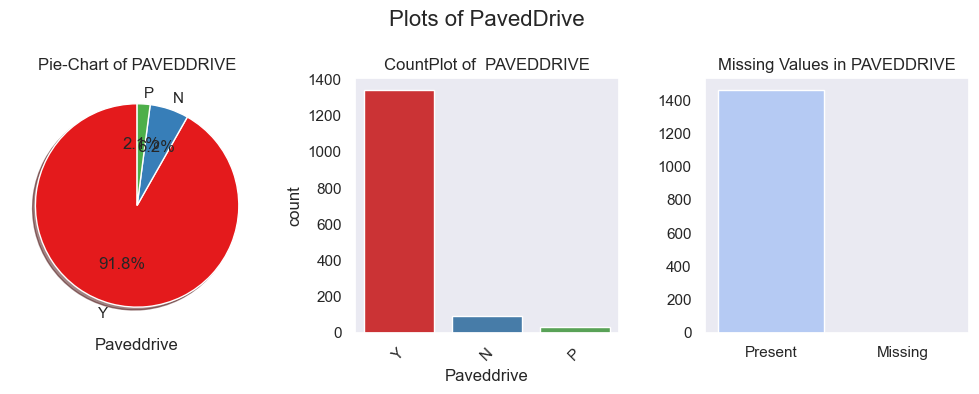

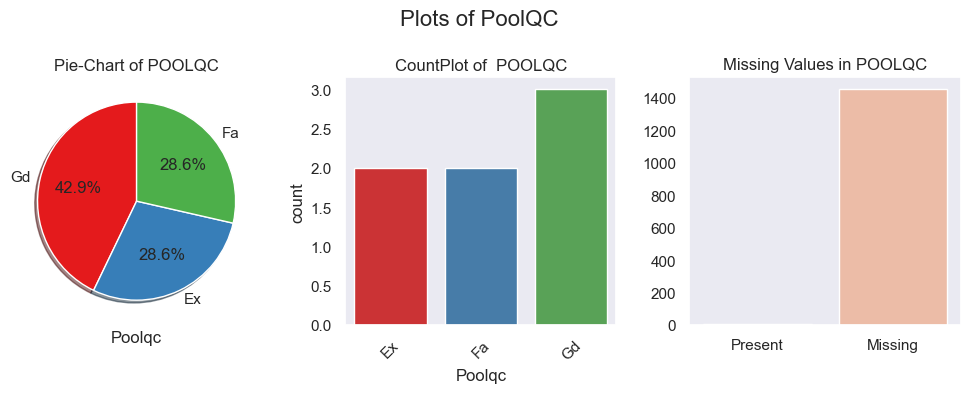

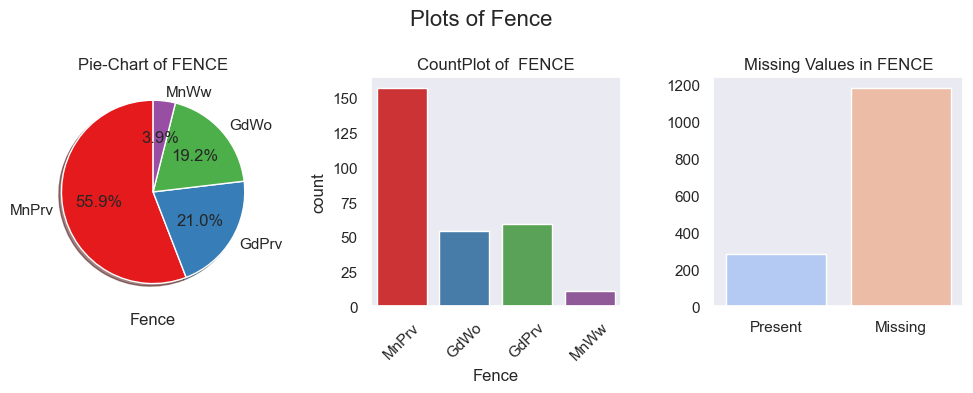

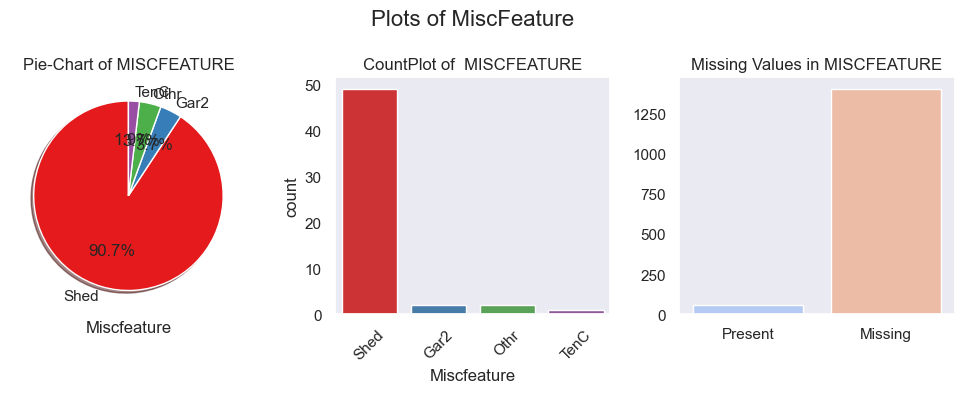

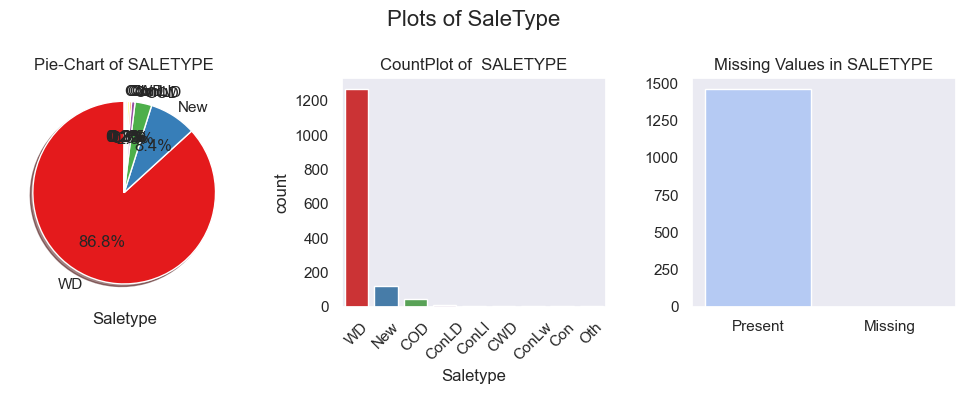

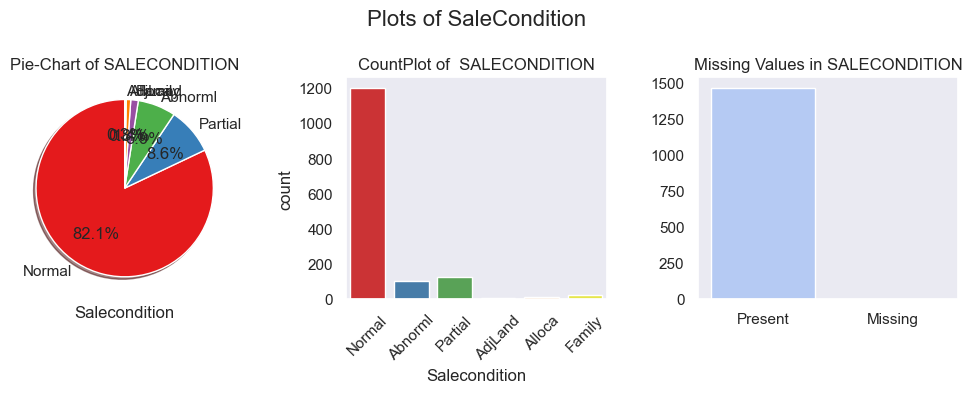

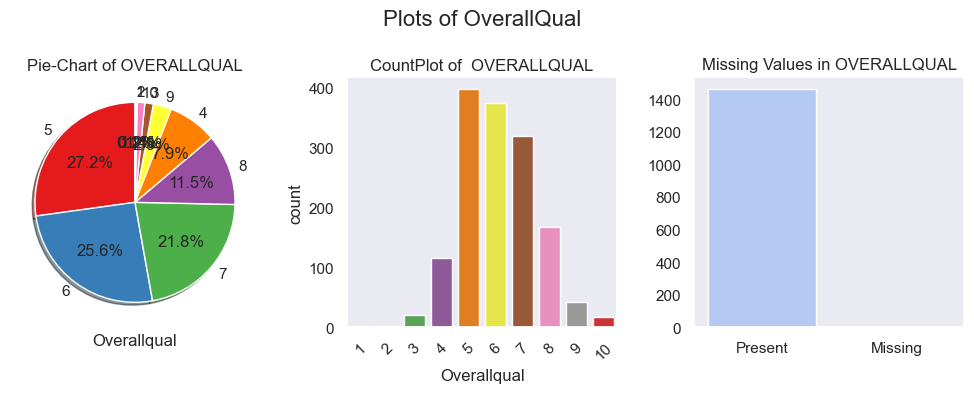

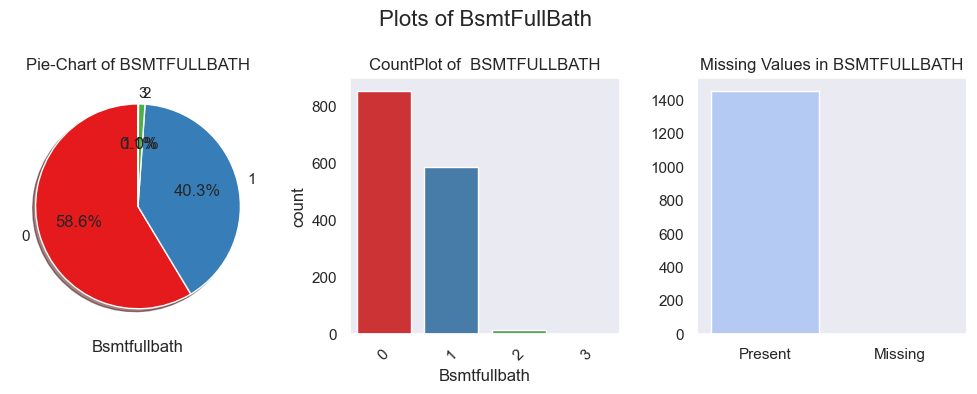

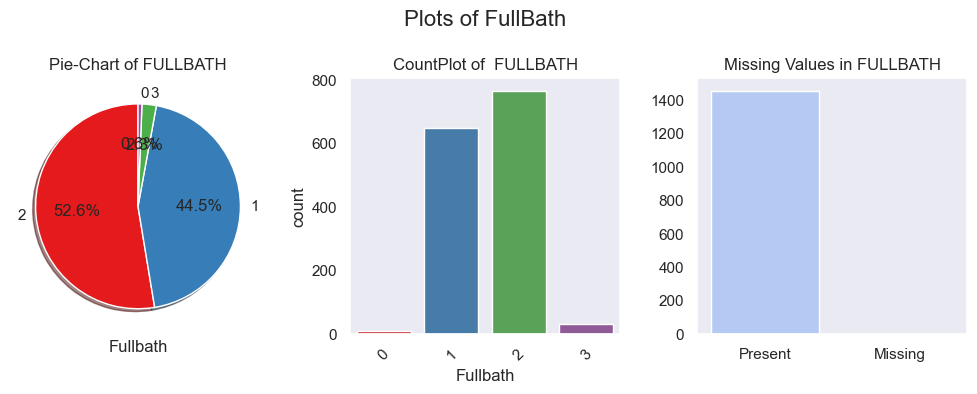

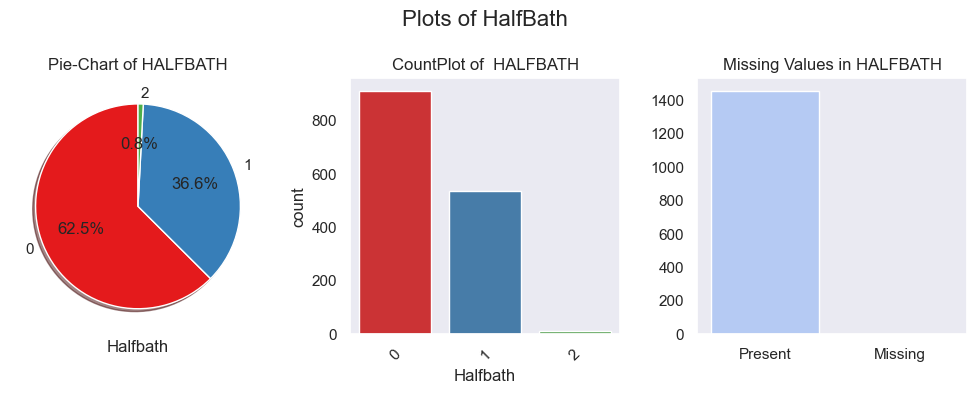

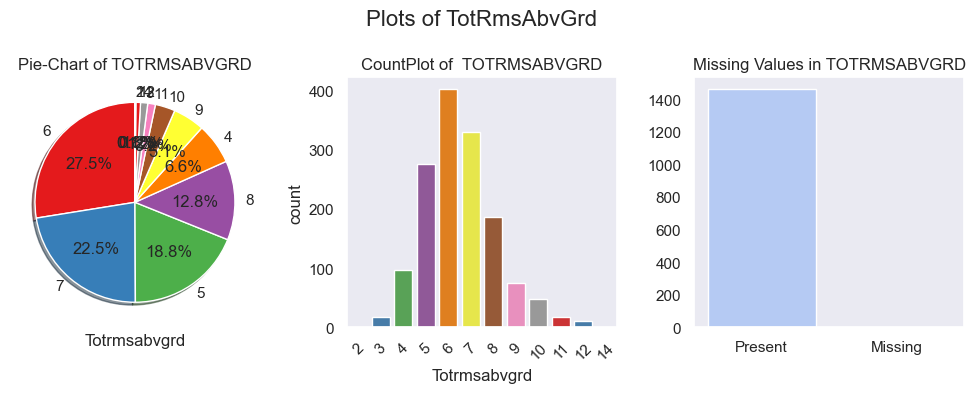

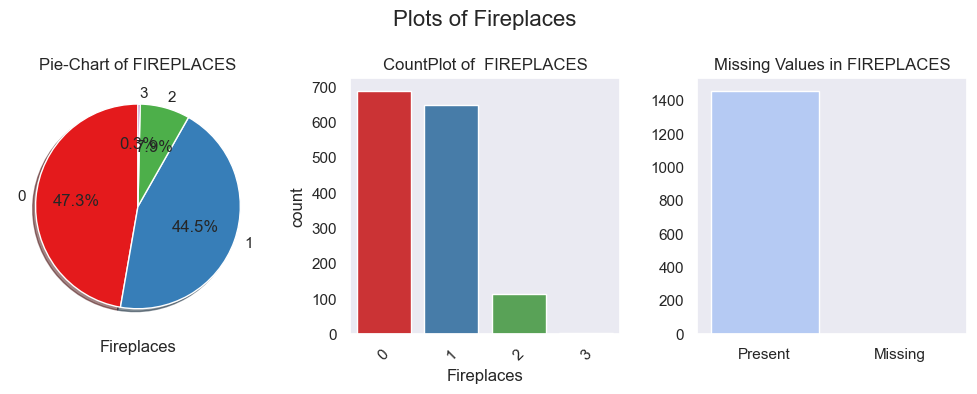

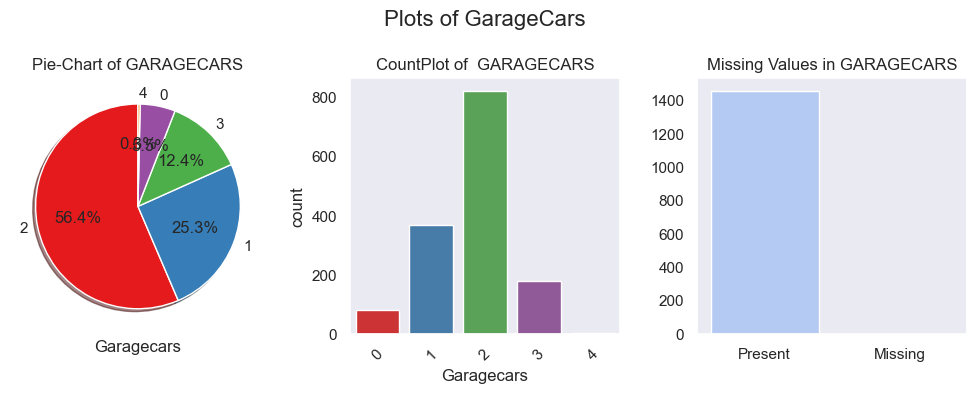

In [86]:
for i in df_cat.columns:
    plot_cat_column(df_cat,i)

- **Missing Values** 
   - Basement Related Feature :'BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2'
   - Garage Related Feature  :'Garagetype','Garagefinish','Garageqaul','Garagecond', 
   - Poolqc : Almost Null Values only.
   - 'Fireplacequ' : Almost Half Null Values.
   - 'Fence' : Mostly Null Values only.
   - 'Miscfeature : Almost Null Value Feature.
- There are some features with quite high **Cardinality** i.e high number of unique values , considering their categorical nature:
    - *High Cardinality Normal Features* : 'Neighbourhood','Exterior1st','Exterior2nd' ,'Housestyle','OverallQual','Totrmsabvgrd'.
    - *High Cardinality Imbalanced Features* : Features which have high cardinality and value is in majority, greater than 90% or approximately :
        - 'LandSlope','Condition1','Condition2','RoofMatl','Bsmtcond','Heating','Centralair','Electrical','Functional','Garagequal'.

### 1.2 Bi-variate Analysis :
- During Bi-Variate Analysis ,we'll do the required preprocessing also ,as the dataset is highly dimensional.

#### 1.2.1 Numerical Features Bi-Variate Analysis with Target : 
- As the *target variable* is a continous feature , so we'll use Scatter Plot for bivariate analysis

In [87]:
num

Index(['LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'GrLivArea', 'GarageYrBlt', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'SalePrice'],
      dtype='object')

In [88]:
df_num.corrwith(df['SalePrice']).sort_values(ascending=False)

SalePrice       1.000000
GrLivArea       0.708624
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
YearBuilt       0.522897
YearRemodAdd    0.507101
GarageYrBlt     0.486362
MasVnrArea      0.477493
BsmtFinSF1      0.386420
LotFrontage     0.351799
WoodDeckSF      0.324413
2ndFlrSF        0.319334
OpenPorchSF     0.315856
LotArea         0.263843
BsmtUnfSF       0.214479
dtype: float64

<AxesSubplot:>

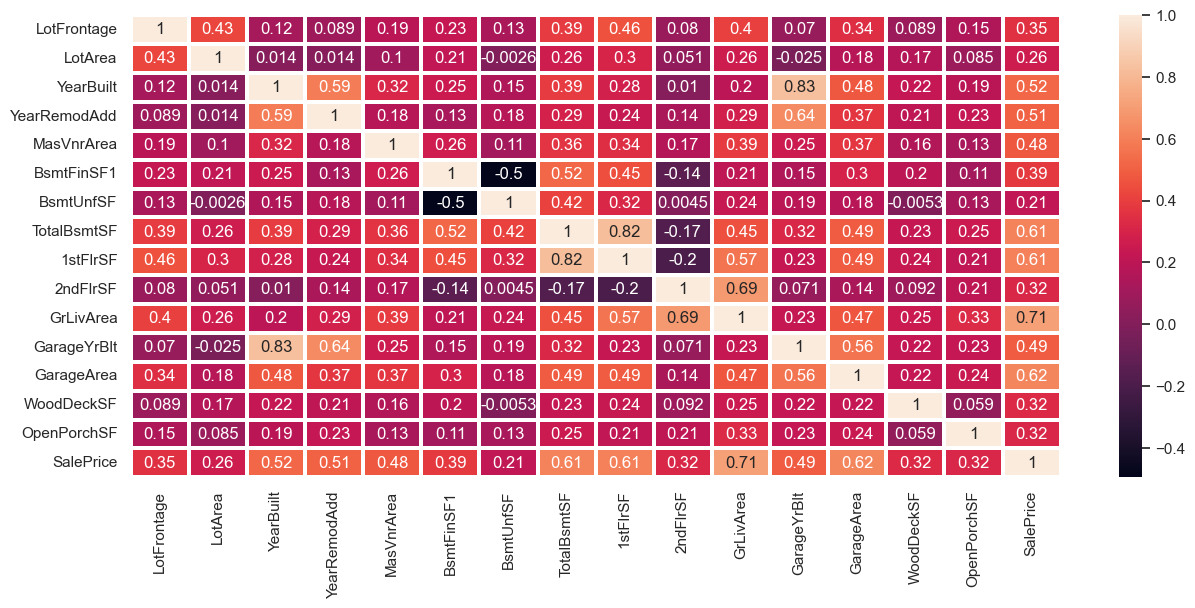

In [89]:
plt.figure(figsize=(15,6))
sns.heatmap(df_num.corr(),annot=True,linewidth=1.5)

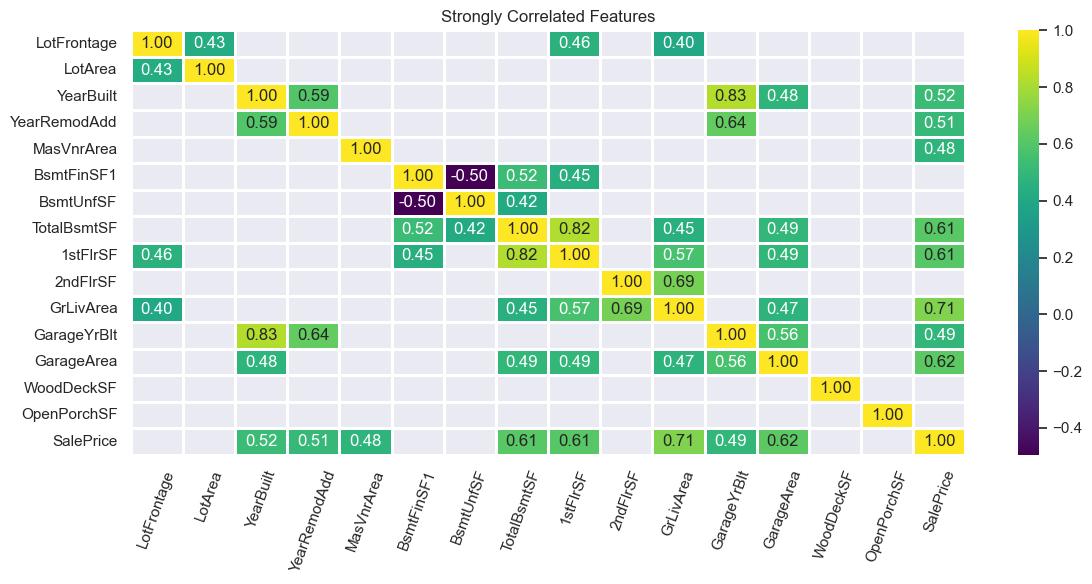

In [90]:
#setting a threshold of 0.4 to marking good correlation
correlation_matrix=df_num.corr()
threshold = 0.4

# Creating a mask to hide weaker correlations
mask = np.abs(correlation_matrix) < threshold
masked_corr_matrix = correlation_matrix.mask(mask)

# Plotting the heatmap with the masked correlation matrix
plt.figure(figsize=(12, 6))
sns.heatmap(masked_corr_matrix, annot=True, cmap='viridis',fmt='.2f', linewidths=1)
plt.title('Strongly Correlated Features')
plt.xticks(rotation=70)
plt.tight_layout()
plt.show()
    

- Most of the features are postively correlated with each other with varying strengths ,except *BsmtUnfSf* and *BsmtFinSF1*.
- For **SalePrice**, 4 Features looks very important :
    - GrLivArea       0.708624
    - GarageArea      0.623431
    - TotalBsmtSF     0.613581
    - 1stFlrSF        0.605852
- *GarageYrBlt* and *YearBuilt* are highly correlated features , and among both *YearBuilt* is highly correlated with the Target Feature so *we can drop **GarageYrBlt** .*
- **GarageYrBlt** is also highly correlated with *YearRemodAdd*

In [91]:
#Dropping GarageYrBlt 
df_num=df_num.drop('GarageYrBlt',axis=1)

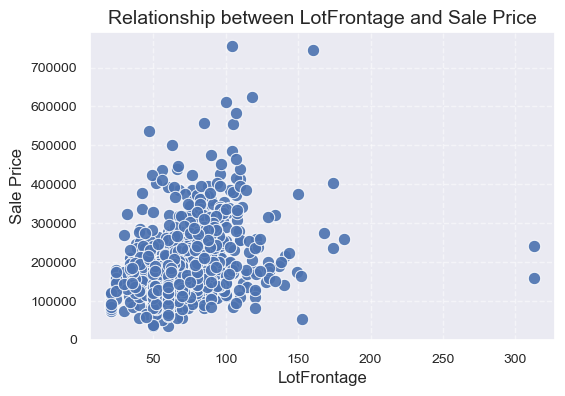

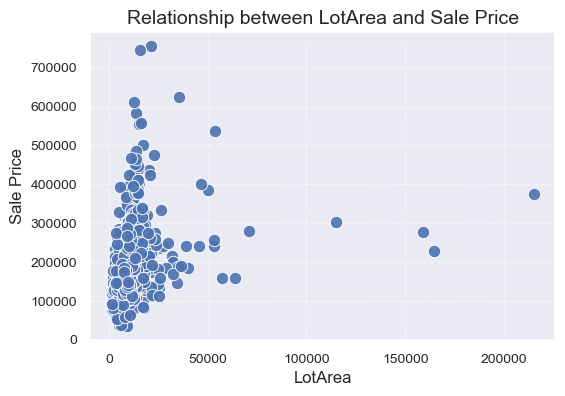

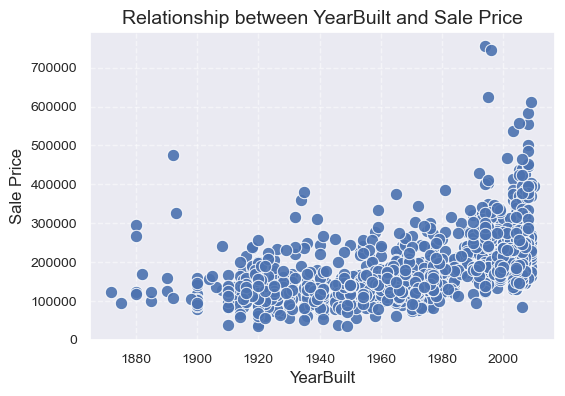

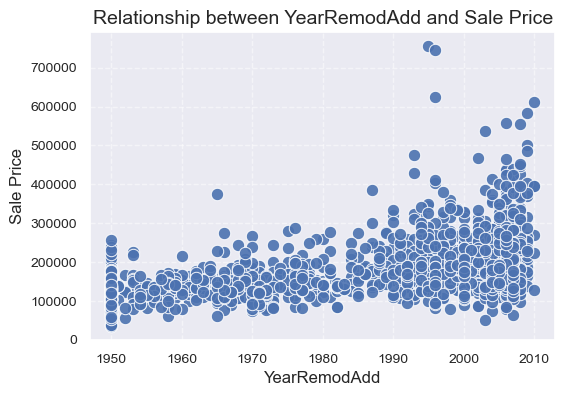

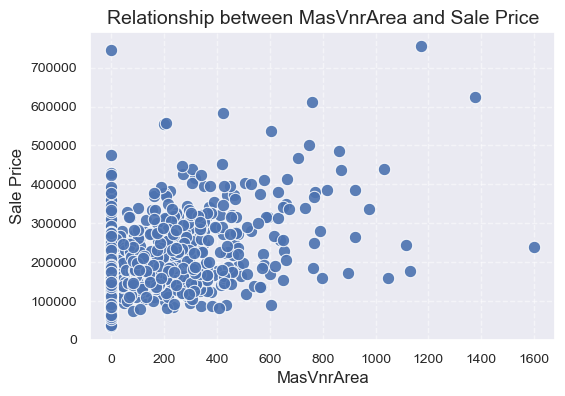

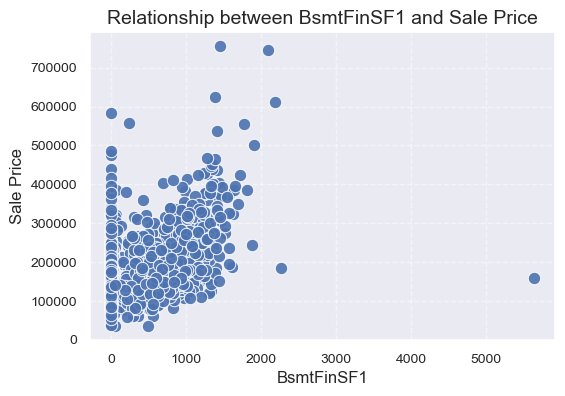

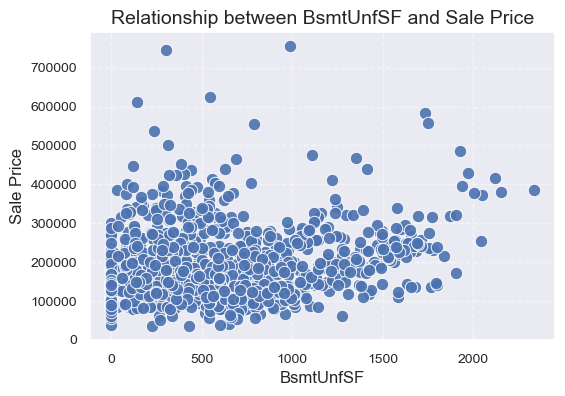

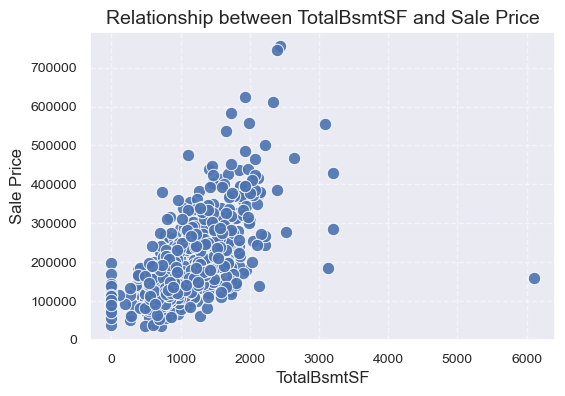

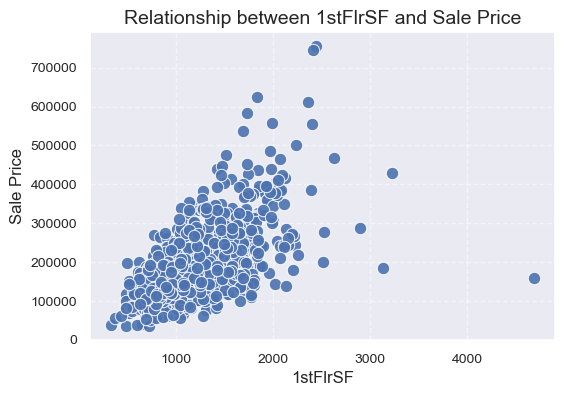

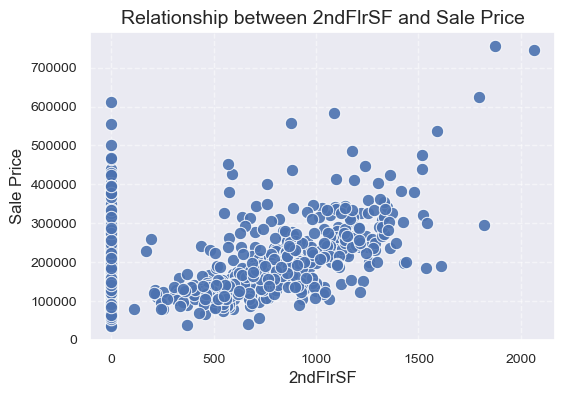

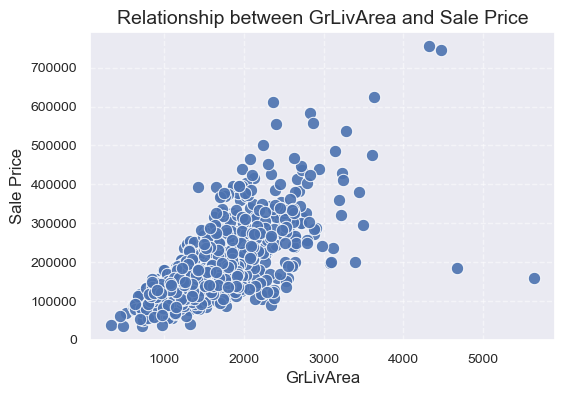

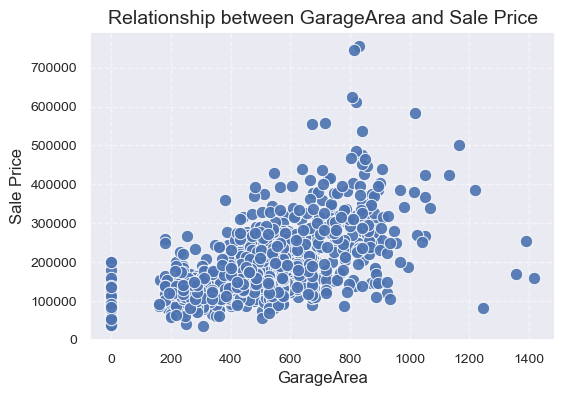

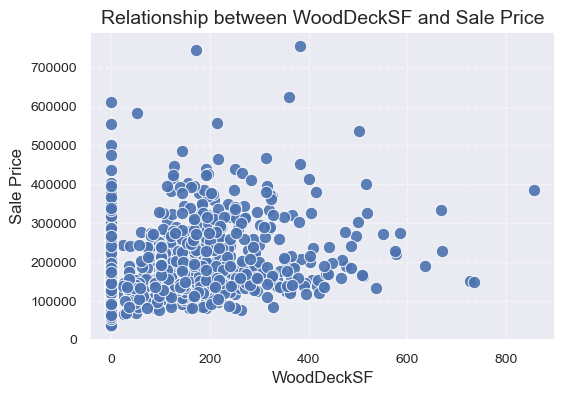

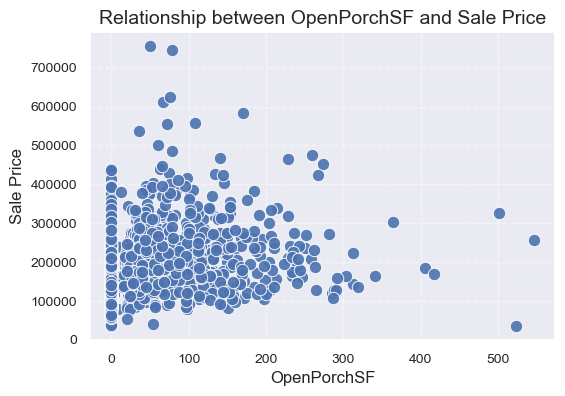

In [92]:
for i in df_num.columns:
    if i!='SalePrice':
        plt.figure(figsize=(6, 4))  # Adjust the figure size

        # Create the scatter plot using Seaborn
        sns.scatterplot(data=df_num, x=i, y='SalePrice', alpha=0.9,s=80)

        # Customize labels and title
        plt.xlabel(f'{i}', fontsize=12)  # X-axis label with increased font size
        plt.ylabel('Sale Price', fontsize=12)   # Y-axis label with increased font size
        plt.title(f'Relationship between {i} and Sale Price', fontsize=14)  # Title with increased font size

        # Customize grid and ticks
        plt.grid(True, linestyle='--', alpha=0.5)  # Add gridlines with a dashed line style
        plt.tick_params(labelsize=10)  # Increase the size of tick labels

        # Show the plot
        plt.show()


- *Features in which we can drop outliers which are not affecting **SalePrice**:
  - 'LotFrontage','LotArea','MasVnrArea','BsmtFinSF1','TotalBsmtSf','1stFlrSF','GarageArea','WoodDeckSF','OpenPorchSF'

#### 1.2.1 Categorical Features Bi-Variate Analysis with Target : 

- Before Studying the relationship let's drop some unimportant Categorical Features ,which we discovered during Univariate Analysis.
- To do this, first we'll run a statistical test to check if there is difference in mean of the Saleprice among various categories, and then we'll drop those features which don't have any difference.
- For running the tests , we need to fill null values first.

In [93]:
(df_cat.isnull().sum()/len(df_cat))

MSZoning         0.000000
LotShape         0.000000
LandContour      0.000000
LotConfig        0.000000
LandSlope        0.000000
Neighborhood     0.000000
Condition1       0.000000
Condition2       0.000000
BldgType         0.000000
HouseStyle       0.000000
RoofStyle        0.000000
RoofMatl         0.000000
Exterior1st      0.000000
Exterior2nd      0.000000
MasVnrType       0.005479
ExterQual        0.000000
ExterCond        0.000000
Foundation       0.000000
BsmtQual         0.025342
BsmtCond         0.025342
BsmtExposure     0.026027
BsmtFinType1     0.025342
BsmtFinType2     0.026027
Heating          0.000000
HeatingQC        0.000000
CentralAir       0.000000
Electrical       0.000685
KitchenQual      0.000000
Functional       0.000000
FireplaceQu      0.472603
GarageType       0.055479
GarageFinish     0.055479
GarageQual       0.055479
GarageCond       0.055479
PavedDrive       0.000000
PoolQC           0.995205
Fence            0.807534
MiscFeature      0.963014
SaleType    

- 'PoolQC','Fence','MiscFeature' is mostly null so let's drop them first.
- 'FireplaceQual' Contains approximately 47% Null Values , so let's run ANOVA to check if this features is important for SalePrice.
- And for remaining null values column we will use 

In [94]:
#Adding SalePrice to categorical group for Analysis
df_cat=pd.concat([df_cat, df['SalePrice']], axis=1)

In [95]:
#Anova Test to check the difference in mean 
category_groups = [df_cat[df_cat['FireplaceQu'] == category]['SalePrice'] for category in df_cat['FireplaceQu'].unique()]
if len(category_groups) > 0:
    f_stat, p_value = stats.f_oneway(*category_groups)

    # Check the p-value
    if p_value < 0.05:
        print("There are significant differences in the numerical target across Fireplace categories.")
    else:
        print("There may not be significant differences in the numerical target across Fireplace categories.")


There may not be significant differences in the numerical target across Fireplace categories.


In [96]:
#Dropping unimportant features with respect to Target Variable.
df_cat=df_cat.drop(['PoolQC','Fence','MiscFeature','FireplaceQu'],axis=1)

- Now let's run ANOVA to find out the features which are helpful in prediction.
- Before running let's fill the null values.

In [97]:
#Filling Null Values in Categorical Features
for i in df_cat.columns:
    if df_cat[i].isnull().any():  # Check if any null values exist in the column
        mode_value = df_cat[i].mode()[0]  # Calculate mode for the column
        df_cat[i].fillna(mode_value, inplace=True)  # Fill null values with mode

In [98]:
#Normalizing the saleprice
df_cat['LogSalePrice'] = np.log(df_cat['SalePrice'])

In [99]:
#Checking for features which don't have significant difference in SalePrice among various categorical values.
for column in df_cat.columns:
    category_groups = [df_cat[df_cat[column] == category]['LogSalePrice'] for category in df_cat[column].unique()]
    f_stat, p_value = stats.f_oneway(*category_groups)
    
    alpha = 0.05  
    
    if p_value > alpha:
        print(f"Feature: {column}")
        print("There is not enough evidence to reject the null hypothesis.")
        print("There may not be significant differences in SalePrice between categories.")
        print("-" * 30)

Feature: LandSlope
There is not enough evidence to reject the null hypothesis.
There may not be significant differences in SalePrice between categories.
------------------------------
Feature: BsmtFinType2
There is not enough evidence to reject the null hypothesis.
There may not be significant differences in SalePrice between categories.
------------------------------


In [100]:
#Dropping statistically insignificant categorical features
df_cat=df_cat.drop(['LandSlope','BsmtFinType2'],axis=1)

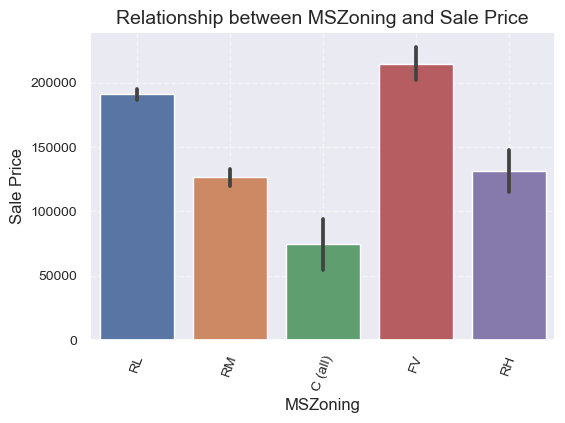

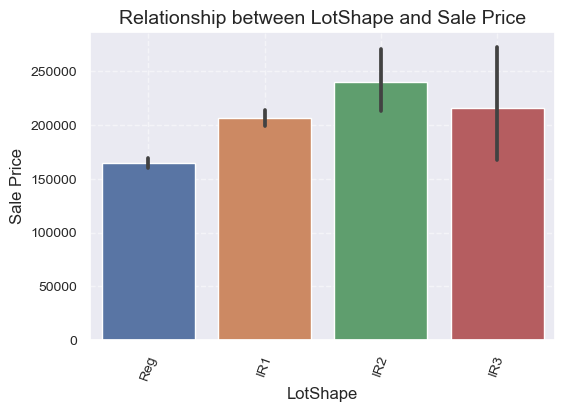

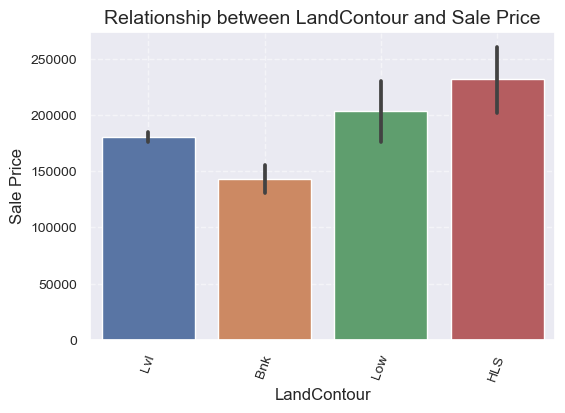

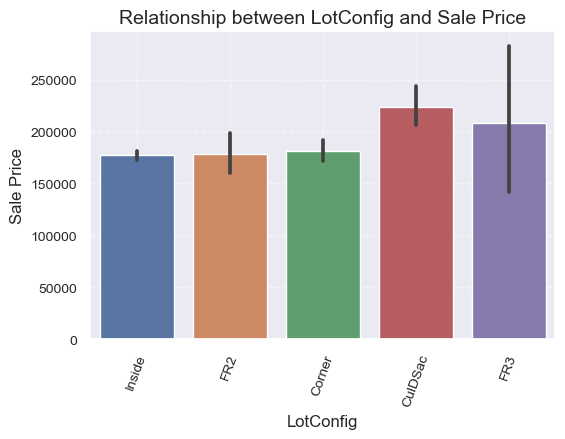

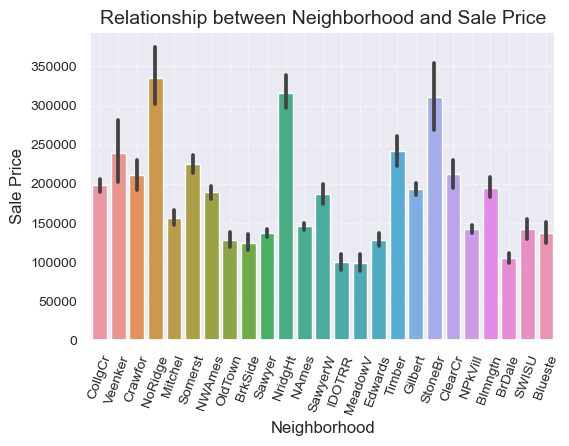

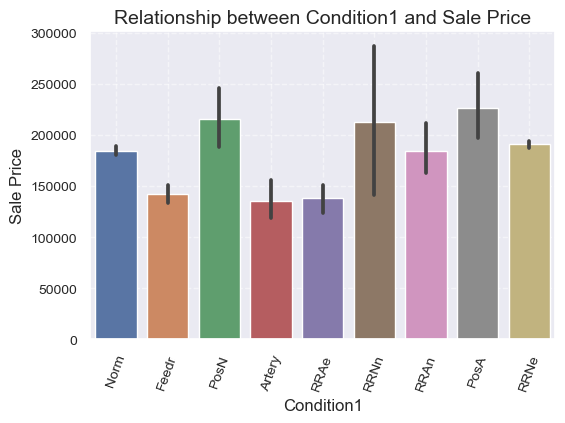

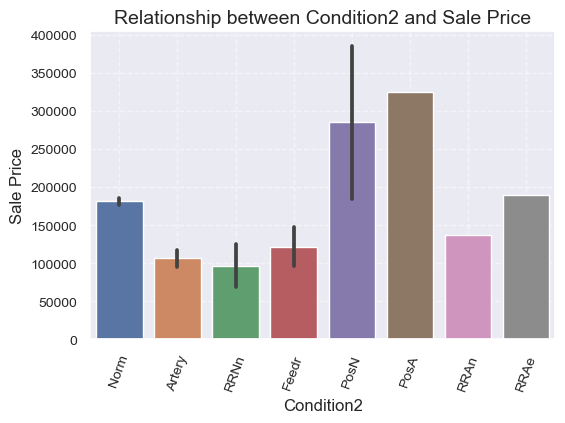

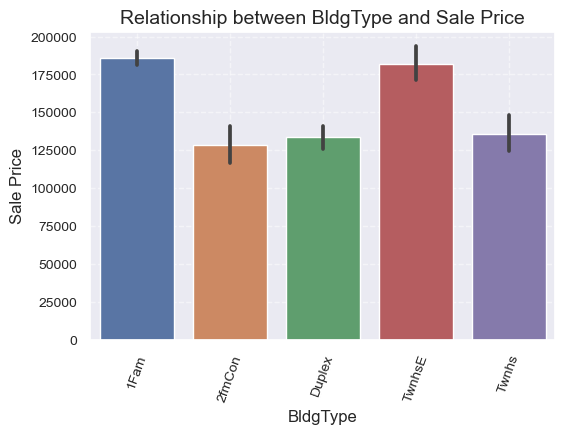

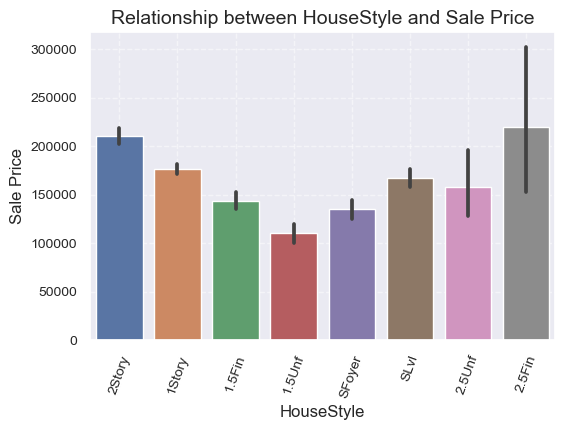

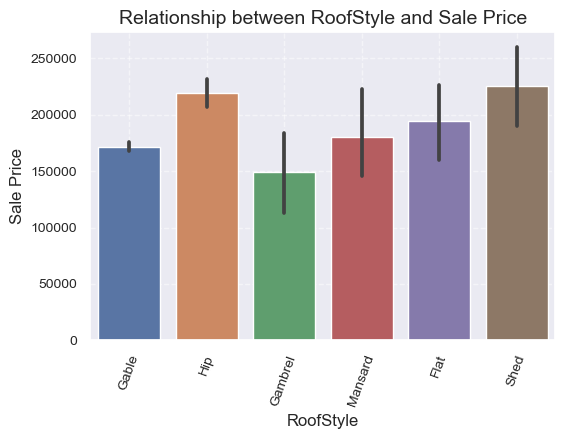

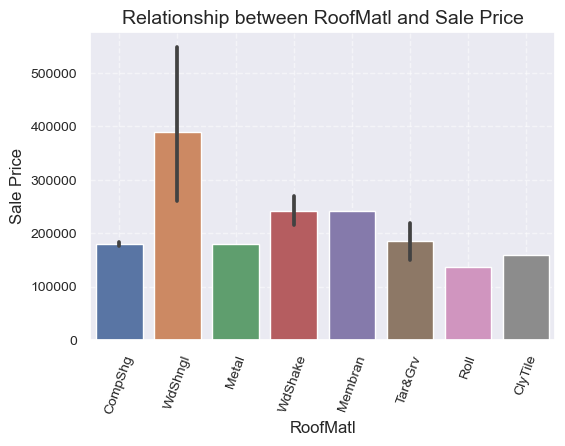

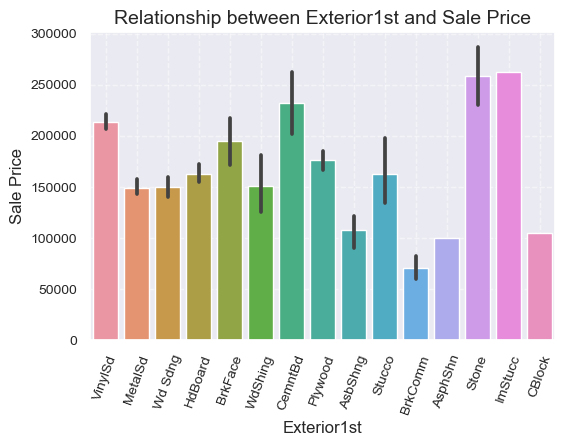

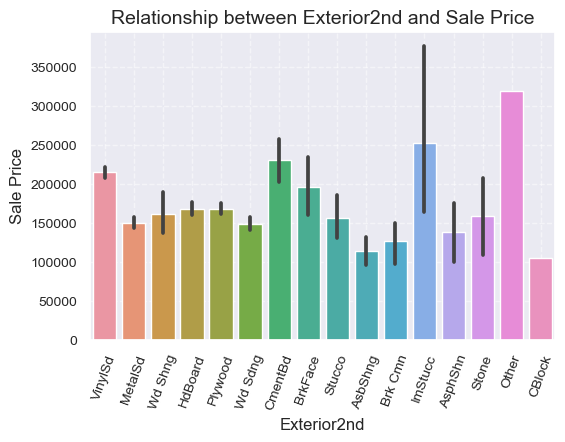

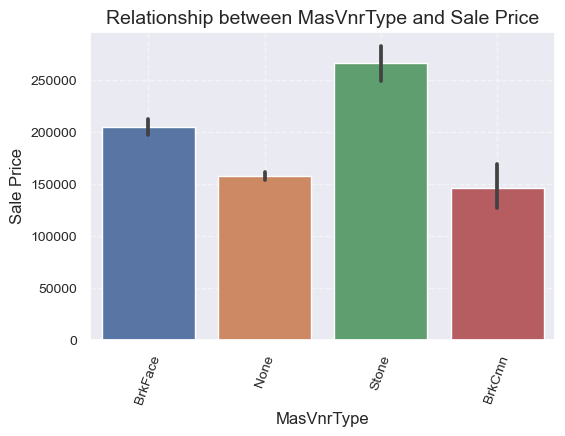

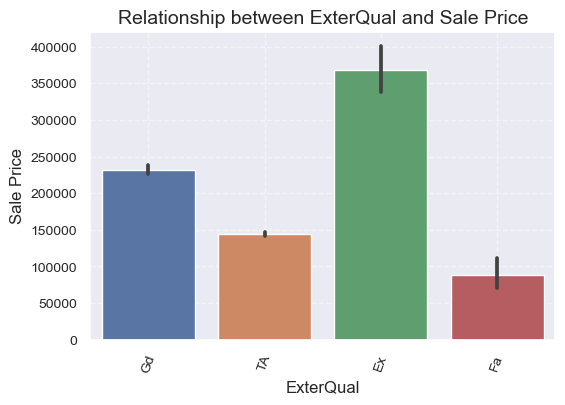

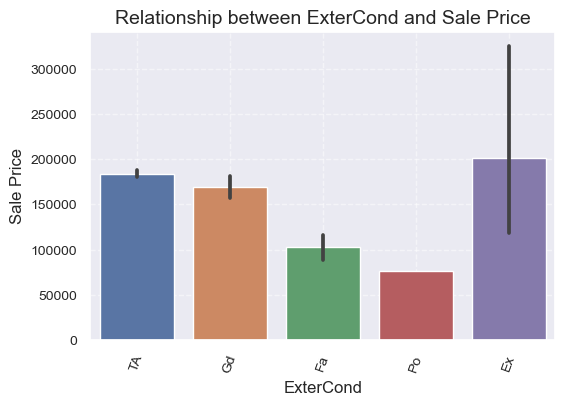

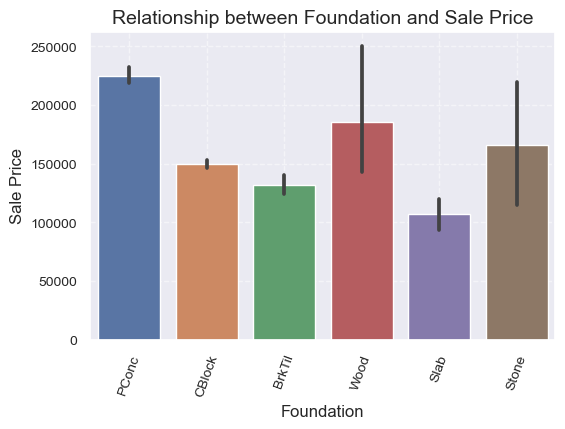

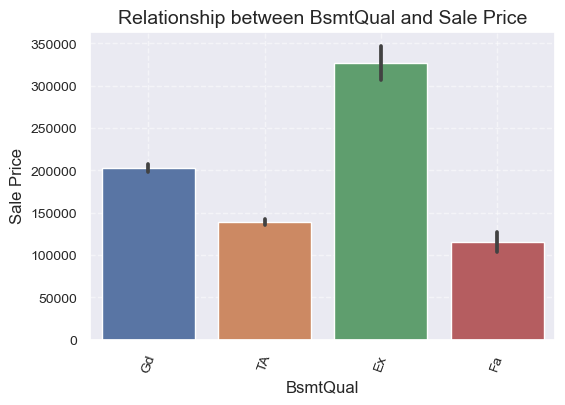

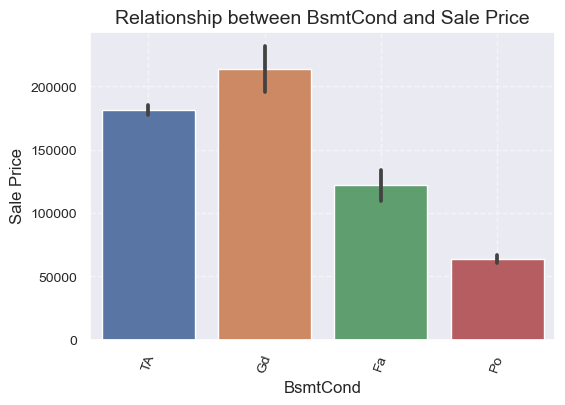

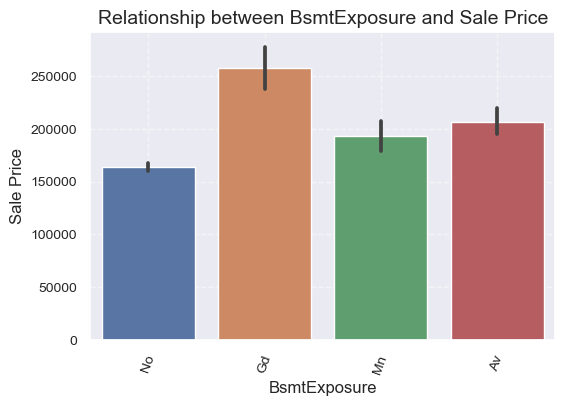

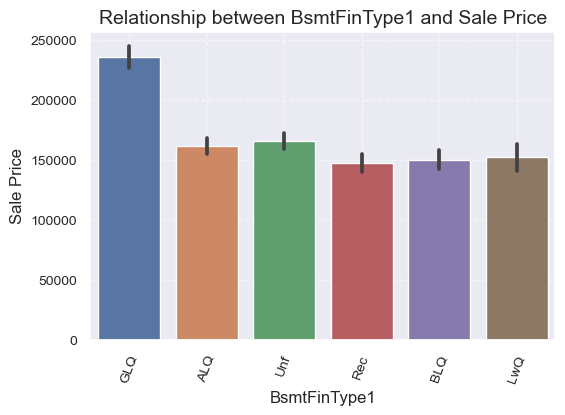

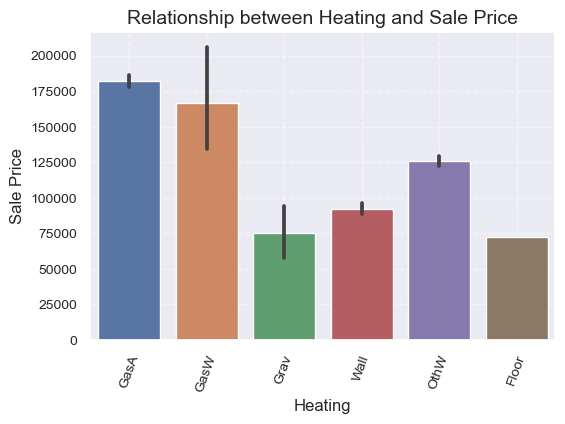

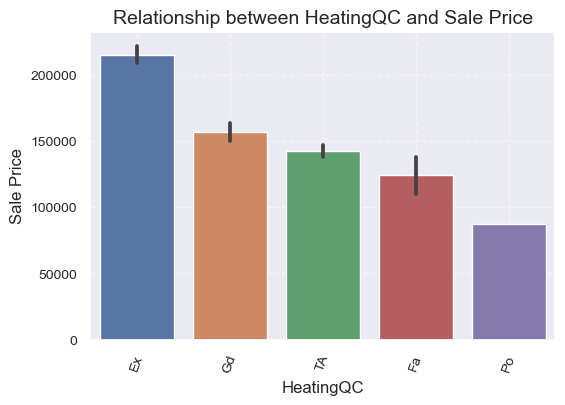

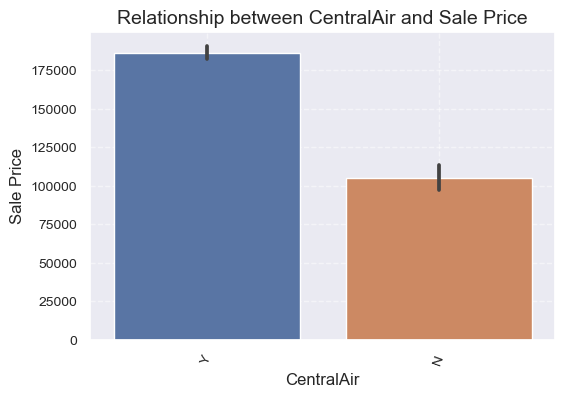

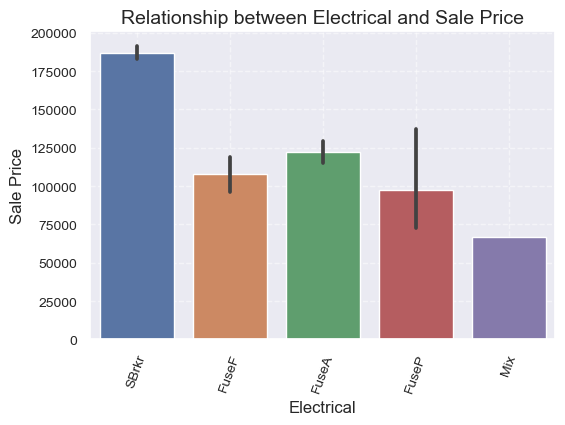

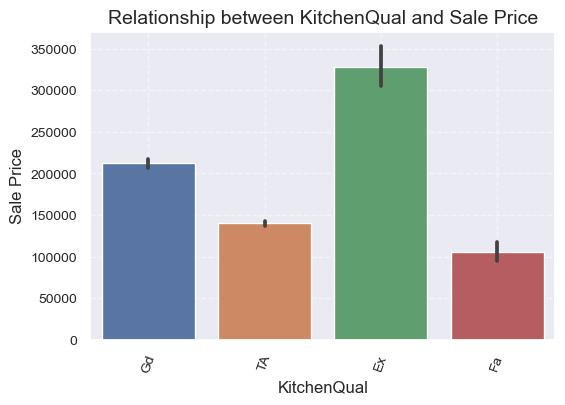

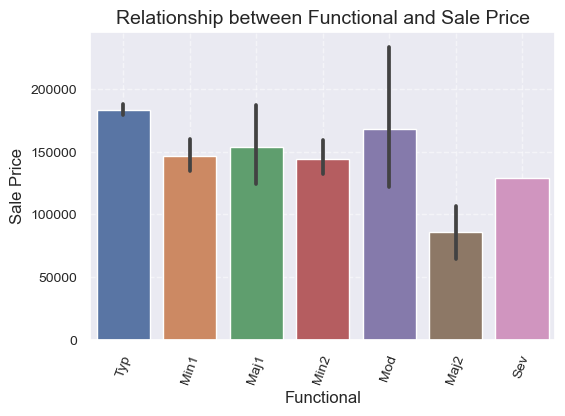

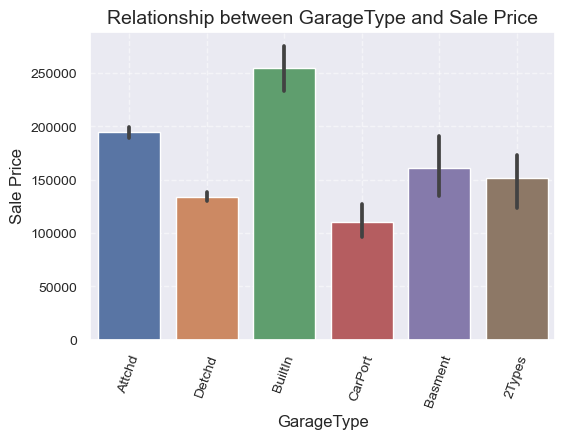

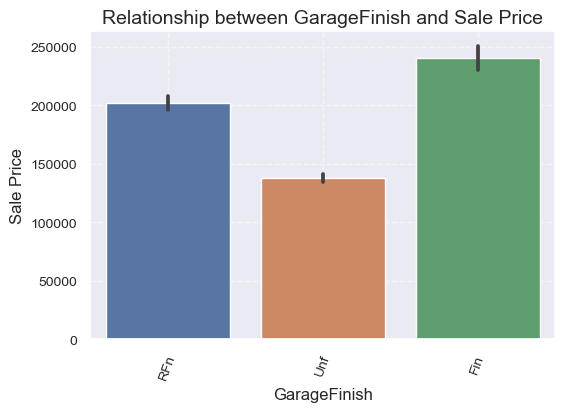

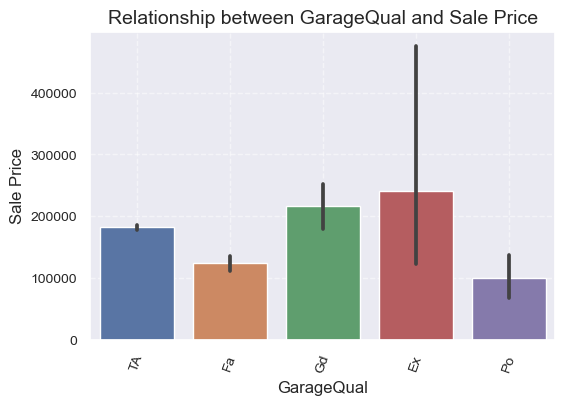

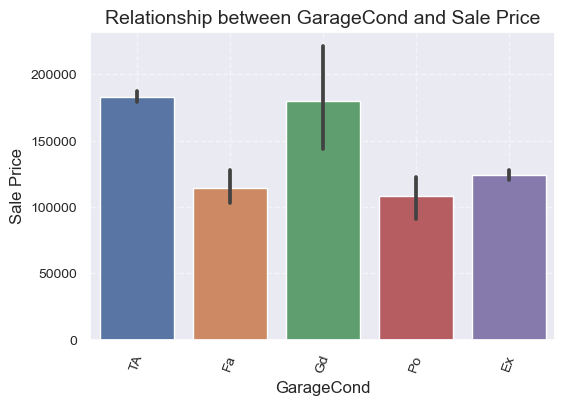

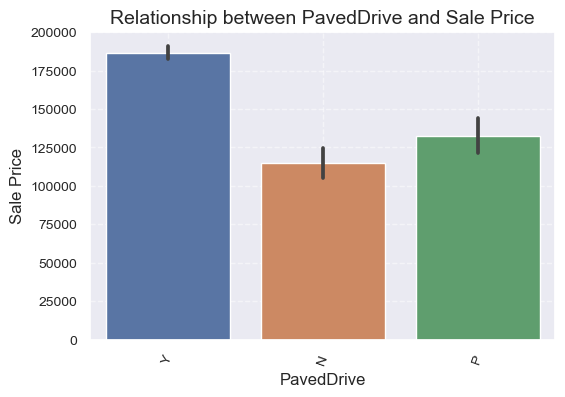

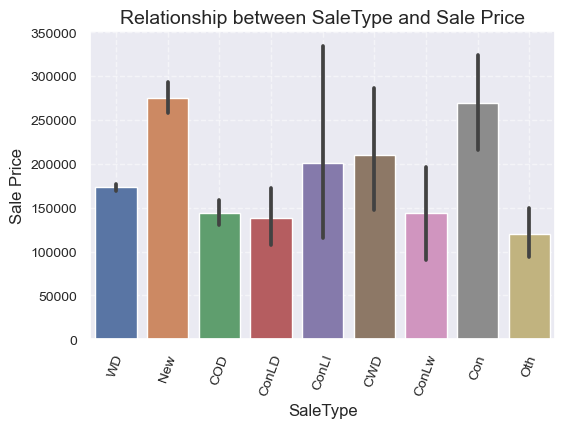

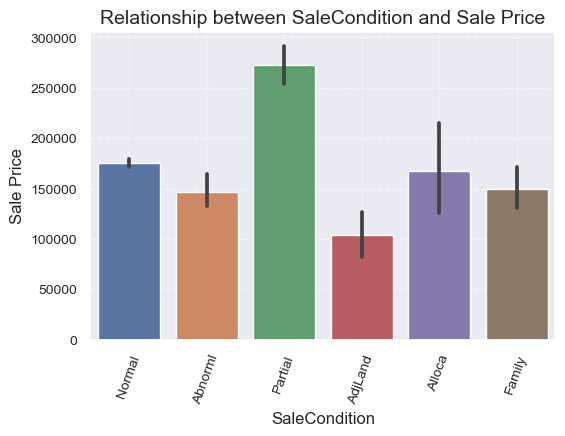

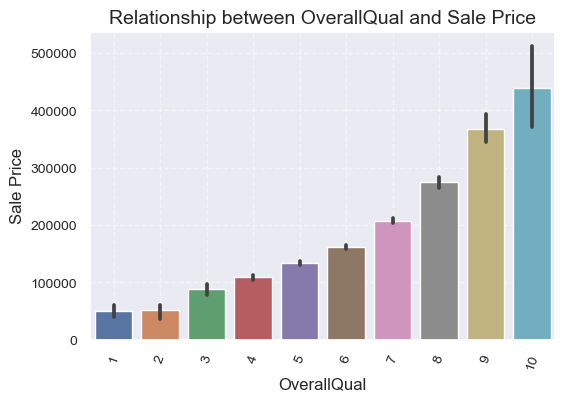

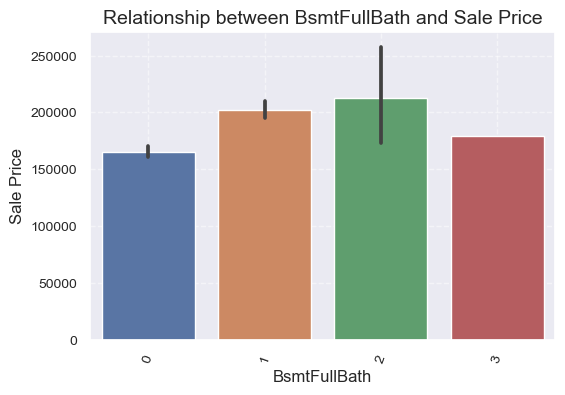

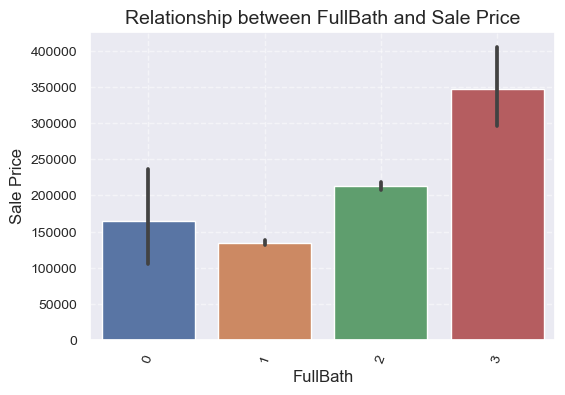

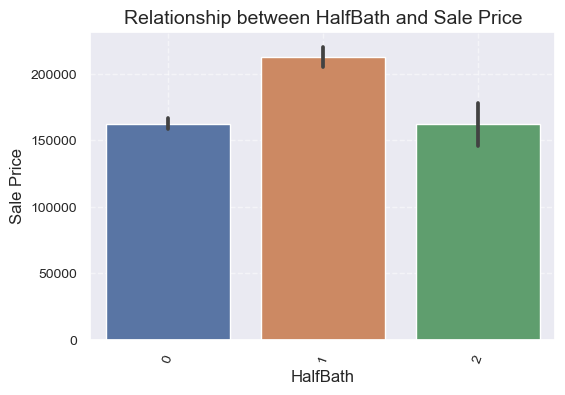

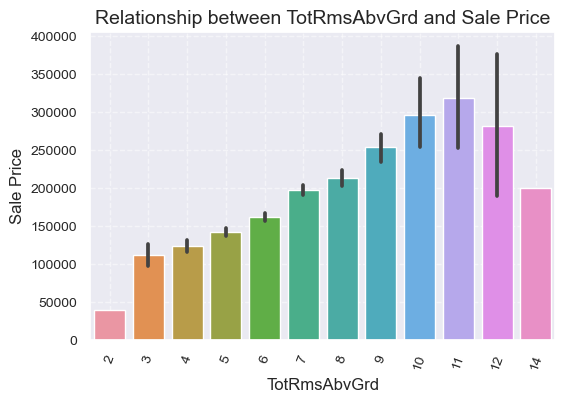

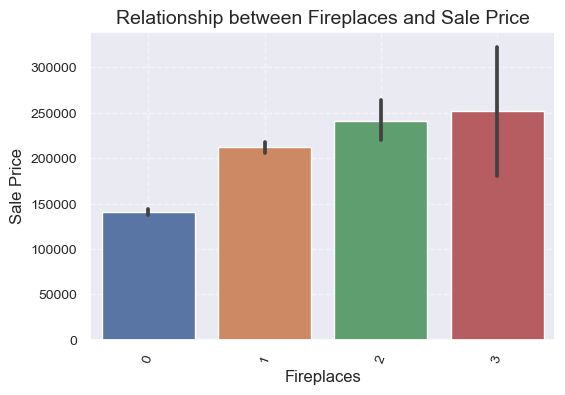

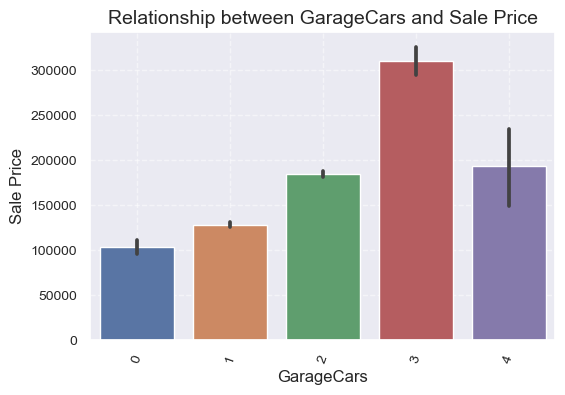

In [101]:
#Plotting Boxplot for each features against Saleprice
for i in df_cat.columns:
    if ((i!='SalePrice') and(i!='LogSalePrice')):
        plt.figure(figsize=(6, 4))  # Adjust the figure size

        # Create the scatter plot using Seaborn
        sns.barplot(data=df_cat, y='SalePrice', x=i)

        # Customize labels and title
        plt.xlabel(f'{i}', fontsize=12)  # X-axis label with increased font size
        plt.ylabel('Sale Price', fontsize=12)   # Y-axis label with increased font size
        plt.title(f'Relationship between {i} and Sale Price', fontsize=14)  # Title with increased font size

        # Customize grid and ticks
        plt.grid(True, linestyle='--', alpha=0.5)  # Add gridlines with a dashed line style
        plt.tick_params(labelsize=10)
        plt.xticks(rotation=70)

        # Show the plot
        plt.show()

## 2. Pre-processing the data :
- We Performed some pre-processing during analysis ,let's perform left out pre processing such as null values, outliers ,encoding ,scaling etc.

In [102]:
#Droping redundant column before joining 
df_cat=df_cat.drop(['SalePrice','LogSalePrice'],axis=1)

In [103]:
# Let's Join Categorical And Numerical Data
df1 = pd.concat([df_cat,df_num],axis=1)

In [104]:
#Complete dataset after dropping some unnecessary features
df1

MSZoning LotShape LandContour LotConfig Neighborhood Condition1  \
0          RL      Reg         Lvl    Inside      CollgCr       Norm   
1          RL      Reg         Lvl       FR2      Veenker      Feedr   
2          RL      IR1         Lvl    Inside      CollgCr       Norm   
3          RL      IR1         Lvl    Corner      Crawfor       Norm   
4          RL      IR1         Lvl       FR2      NoRidge       Norm   
...       ...      ...         ...       ...          ...        ...   
1455       RL      Reg         Lvl    Inside      Gilbert       Norm   
1456       RL      Reg         Lvl    Inside       NWAmes       Norm   
1457       RL      Reg         Lvl    Inside      Crawfor       Norm   
1458       RL      Reg         Lvl    Inside        NAmes       Norm   
1459       RL      Reg         Lvl    Inside      Edwards       Norm   

     Condition2 BldgType HouseStyle RoofStyle RoofMatl Exterior1st  \
0          Norm     1Fam     2Story     Gable  CompShg     VinylSd   
1          Norm     1Fam     1Story     Gable  CompShg     MetalSd   
2          Norm     1Fam     2Story     Gable  CompShg     VinylSd   
3          Norm     1Fam     2Story     Gable  CompShg     Wd Sdng   
4          Norm     1Fam     2Story     Gable  CompShg     VinylSd   
...         ...      ...        ...       ...      ...         ...   
1455       Norm     1Fam     2Story     Gable  CompShg     VinylSd   
1456       Norm     1Fam     1Story     Gable  CompShg     Plywood   
1457       Norm     1Fam     2Story     Gable  CompShg     CemntBd   
1458       Norm     1Fam     1Story       Hip  CompShg     MetalSd   
1459       Norm     1Fam     1Story     Gable  CompShg     HdBoard   

     Exterior2nd MasVnrType ExterQual ExterCond Foundation BsmtQual BsmtCond  \
0        VinylSd    BrkFace        Gd        TA      PConc       Gd       TA   
1        MetalSd       None        TA        TA     CBlock       Gd       TA   
2        VinylSd    BrkFace        Gd        TA      PConc       Gd       TA   
3        Wd Shng       None        TA        TA     BrkTil       TA       Gd   
4        VinylSd    BrkFace        Gd        TA      PConc       Gd       TA   
...          ...        ...       ...       ...        ...      ...      ...   
1455     VinylSd       None        TA        TA      PConc       Gd       TA   
1456     Plywood      Stone        TA        TA     CBlock       Gd       TA   
1457     CmentBd       None        Ex        Gd      Stone       TA       Gd   
1458     MetalSd       None        TA        TA     CBlock       TA       TA   
1459     HdBoard       None        Gd        TA     CBlock       TA       TA   

     BsmtExposure BsmtFinType1 Heating HeatingQC CentralAir Electrical  \
0              No          GLQ    GasA        Ex          Y      SBrkr   
1              Gd          ALQ    GasA        Ex          Y      SBrkr   
2              Mn          GLQ    GasA        Ex          Y      SBrkr   
3              No          ALQ    GasA        Gd          Y      SBrkr   
4              Av          GLQ    GasA        Ex          Y      SBrkr   
...           ...          ...     ...       ...        ...        ...   
1455           No          Unf    GasA        Ex          Y      SBrkr   
1456           No          ALQ    GasA        TA          Y      SBrkr   
1457           No          GLQ    GasA        Ex          Y      SBrkr   
1458           Mn          GLQ    GasA        Gd          Y      FuseA   
1459           No          BLQ    GasA        Gd          Y      SBrkr   

     KitchenQual Functional GarageType GarageFinish GarageQual GarageCond  \
0             Gd        Typ     Attchd          RFn         TA         TA   
1             TA        Typ     Attchd          RFn         TA         TA   
2             Gd        Typ     Attchd          RFn         TA         TA   
3             Gd        Typ     Detchd          Unf         TA         TA   
4             Gd        Typ     Attchd          RFn         TA  

### 2.1 Null Value Treatment:
- During Bi-Variate Analysis we dealt with Categorical Features Null Values.
- Let's deal with the Numerical Features Null Values.

In [105]:
df1.isnull().sum()

MSZoning           0
LotShape           0
LandContour        0
LotConfig          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
RoofStyle          0
RoofMatl           0
Exterior1st        0
Exterior2nd        0
MasVnrType         0
ExterQual          0
ExterCond          0
Foundation         0
BsmtQual           0
BsmtCond           0
BsmtExposure       0
BsmtFinType1       0
Heating            0
HeatingQC          0
CentralAir         0
Electrical         0
KitchenQual        0
Functional         0
GarageType         0
GarageFinish       0
GarageQual         0
GarageCond         0
PavedDrive         0
SaleType           0
SaleCondition      0
OverallQual        0
BsmtFullBath       0
FullBath           0
HalfBath           0
TotRmsAbvGrd       0
Fireplaces         0
GarageCars         0
LotFrontage      259
LotArea            0
YearBuilt          0
YearRemodAdd       0
MasVnrArea         8
BsmtFinSF1         0
BsmtUnfSF    

In [106]:
# Create an instance of KNNImputer
imputer = KNNImputer(n_neighbors=5)

# Impute missing values using KNN imputer on df_num
imputed_data = imputer.fit_transform(df_num)

# Convert the imputed numpy array back to a DataFrame with the original column names
df_num = pd.DataFrame(imputed_data, columns=df_num.columns)

### 2.2 Outlier Treatment :

- Let's First Treat Outliers of the features which doesn't require extra digging.

In [107]:
Outliers_1=['LotFrontage','LotArea','MasVnrArea','BsmtFinSF1','TotalBsmtSF','1stFlrSF','GarageArea','WoodDeckSF','OpenPorchSF']

In [108]:
# Function to remove outliers based on IQR for specific columns
def remove_outliers_iqr(df, columns):
    for col in columns:
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

In [109]:
df_clean = remove_outliers_iqr(df1,Outliers_1)

In [110]:
# Detect categorical columns based on their data types
categorical_columns = df_clean.select_dtypes(include=['object']).columns.tolist()

# Use pandas get_dummies to perform one-hot encoding for categorical columns
df_clean_encoded = pd.get_dummies(df_clean, columns=categorical_columns, drop_first=True)



In [111]:
df_clean_encoded.shape

(875, 193)

In [112]:
df_clean_encoded

OverallQual  BsmtFullBath  FullBath  HalfBath  TotRmsAbvGrd  Fireplaces  \
0               7             1         2         1             8           0   
1               6             0         2         0             6           1   
2               7             1         2         1             6           1   
3               7             1         1         0             7           1   
4               8             1         2         1             9           1   
...           ...           ...       ...       ...           ...         ...   
1452            5             1         1         0             5           0   
1454            7             1         2         0             6           0   
1455            6             0         2         1             7           1   
1457            7             0         2         0             9           2   
1458            5             1         1         0             5           0   

      GarageCars  LotFrontage  LotArea  YearBuilt  YearRemodAdd  MasVnrArea  \
0              2         65.0     8450       2003          2003       196.0   
1              2         80.0     9600       1976          1976         0.0   
2              2         68.0    11250       2001          2002       162.0   
3              3         60.0     9550       1915          1970         0.0   
4              3         84.0    14260       2000          2000       350.0   
...          ...          ...      ...        ...           ...         ...   
1452           2         35.0     3675       2005          2005        80.0   
1454           2         62.0     7500       2004          2005         0.0   
1455           2         62.0     7917       1999          2000         0.0   
1457           1         66.0     9042       1941          2006         0.0   
1458           1         68.0     9717       1950          1996         0.0   

      BsmtFinSF1  BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  GrLivArea  \
0            706        150          856       856       854       1710   
1            978        284         1262      1262         0       1262   
2            486        434          920       920       866       1786   
3            216        540          756       961       756       1717   
4            655        490         1145      1145      1053       2198   
...          ...        ...          ...       ...       ...        ...   
1452         547          0          547      1072         0       1072   
1454         410        811         1221      1221         0       1221   
1455           0        953          953       953       694       1647   
1457         275        877         1152      1188      1152       2340   
1458          49          0         1078      1078         0       1078   

      GarageArea  WoodDeckSF  OpenPorchSF  SalePrice  MSZoning_FV  \
0            548           0           61     208500            0   
1            460         298            0     181500            0   
2            608           0           42     223500            0   
3            642           0           35     140000            0   
4            836         192           84     250000            0   
...          ...         ...          ...        ...          ...   
1452         525           0           28     145000            0   
1454         400           0          113     185000            1   
1455         460           0           40     175000            0   
1457         252           0           60     266500            0   
1458         240         366            0     142125            0   

      MSZoning_RH  MSZoning_RL  MSZoning_RM  LotShape_IR2  LotShape_IR3  \
0               0            1            0             0             0   
1               0            1            0             0             0   
2               0            1            0             0             0   
3               0            1            0           

In [113]:
X = df_clean_encoded.drop('SalePrice', axis=1)
y = df_clean_encoded['SalePrice']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Selecting numerical columns (excluding target variable if present)
numerical_columns = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Initializing the Robust Scaler
scaler = RobustScaler()

# Fit and transform the scaler on numerical columns of the training data
X_train[numerical_columns] = scaler.fit_transform(X_train[numerical_columns])

# Apply the same transformation to the numerical columns of the test data
X_test[numerical_columns] = scaler.transform(X_test[numerical_columns])


### 3. Model Building :
- We are going to use multiple models and compare their accuracy.

In [114]:
# Initialize models in a dictionary
models = {
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'AdaBoost': AdaBoostRegressor(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42),
    'XGBoost': XGBRegressor(objective='reg:squarederror', colsample_bytree=0.3, learning_rate=0.1,
                             max_depth=5, alpha=10, n_estimators=100)
}

# Fit models and make predictions
predictions = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    predictions[name] = y_pred

# Calculate RMSE for each model
rmse_results = {}
for name, y_pred in predictions.items():
    mse = mean_squared_error(y_test, y_pred)
    rmse = round(np.sqrt(mse),2)
    rmse_results[name] = rmse

rmse_df = pd.DataFrame(rmse_results.items(), columns=['Model', 'RMSE'])
rmse_df


Model      RMSE
0      Decision Tree  31135.65
1      Random Forest  19228.99
2           AdaBoost  23793.96
3  Gradient Boosting  18380.62
4            XGBoost  16747.36

## Conclusion :

- The RMSE values indicate the average prediction error of each model in predicting house prices. Lower RMSE values suggest better predictive performance.
- Based on the RMSE scores, the models are ranked in terms of their predictive accuracy. 
- **XGBoost** appears to have the **lowest RMSE** among the evaluated models, indicating its superior performance in predicting house prices compared to the other models.

## Accuracy Improvement Steps :

- We can study the features with a domain expert , and give some more time to understand the dependency of Saleprice on Various features.
- Use a feature selection technique ,to select most prominent feaatures.
- Tune the best performing model which is XGBoost, to improve the accuracy and overall performance of model